In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf



In [2]:
data = pd.read_csv("/Users/swetarai/GSE_merging_data/mergeDatasets_raw.csv")
data.describe()

,batch,DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,...,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,1.878571,3.404847,3.220587,3.599162,3.662413,2.212593,3.809161,3.211291,2.301299,3.769689,...,3.007183,3.188942,2.282413,2.468621,2.704038,3.337594,2.855524,3.026234,3.815212,3.541921
std,1.139424,1.986183,1.548786,1.773669,2.293791,1.439003,1.949313,1.221101,1.097433,1.756885,...,1.181688,1.494665,0.962913,1.135663,1.331829,1.861329,1.111807,1.299339,3.128460,1.802287
min,1.000000,2.210258,1.964559,1.728864,2.534285,0.763222,2.775475,2.462072,1.233658,1.247759,...,2.255878,2.186658,1.149844,1.090509,1.734007,1.945942,1.898587,2.145657,2.242118,2.289721
25%,1.000000,2.478760,2.636182,2.736942,2.719168,1.762180,3.066759,2.693345,1.924776,3.261793,...,2.552658,2.649374,1.933726,2.055486,2.159471,2.625809,2.396772,2.370184,2.547735,2.871153
50%,2.000000,2.862690,2.740673,3.269271,2.939280,1.802428,3.107533,2.761081,1.983701,3.533784,...,2.615989,2.709300,2.006830,2.197090,2.261914,2.727606,2.517815,2.729734,2.817632,2.931238
75%,2.000000,2.902721,2.787678,3.339580,2.976071,1.848038,3.241116,2.951456,2.069982,3.585457,...,2.682912,2.755676,2.108431,2.291594,2.391132,2.816695,2.630588,2.771166,2.870993,2.978027
max,5.000000,10.030543,8.604368,9.539353,10.568279,8.688950,9.825185,7.313790,6.680043,11.209295,...,7.335783,8.093286,6.411087,7.541654,7.398316,9.620854,6.776104,7.802193,13.511456,9.589277


In [3]:
data.head()

,Unnamed: 0,batch,sample,V1,Gender,Disease_state,platform,tissue,DDR1,RFC2,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,GSM2449608,1,GSM2449608,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,GSM2449609,1,GSM2449609,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,GSM2449610,1,GSM2449610,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,GSM2449611,1,GSM2449611,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,GSM2449612,1,GSM2449612,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008


In [4]:
data.shape

(560, 12864)

In [5]:
data['Gender'].value_counts()

Gender
Female    459
Male      101
Name: count, dtype: int64

In [6]:
data = data.drop('V1', axis=1)

In [7]:
data['Gender']

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
555      Male
556    Female
557      Male
558      Male
559      Male
Name: Gender, Length: 560, dtype: object

In [8]:
rows, columns = data.shape

In [9]:
data = data.drop('Unnamed: 0', axis=1)

In [10]:
# Get the indices of rows where 'Disease' is 'OA'
indices_to_drop = data[data['Disease_state'] == 'OA'].index

# Drop these rows
df_filtered = data.drop(indices_to_drop)

# Display the filtered DataFrame
df_filtered

,batch,sample,Gender,Disease_state,platform,tissue,DDR1,RFC2,HSPA6,PAX8,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,1,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,3.200373,3.008607,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,1,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,3.187529,2.991917,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,1,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,3.253123,2.971649,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,1,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,3.333800,3.020300,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,1,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,3.266168,2.980154,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,8.655209,7.431121,8.700752,10.113026,...,6.577671,7.126281,4.336341,5.998381,6.113050,7.554481,5.249426,7.802167,11.379362,9.049751
556,5,GSM303523,Female,RA,GPL96,synovial_membrane,8.841976,7.277250,8.234683,9.800434,...,5.944969,5.988112,5.164798,4.749352,6.594829,8.940687,6.609307,6.646177,13.511456,8.360654
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,8.889370,7.637270,8.803172,9.716394,...,6.518371,7.221036,4.485807,5.947718,6.000559,9.543925,5.079634,6.120532,13.139505,8.224006
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,8.851196,7.001431,8.887422,10.197770,...,6.360350,7.374926,4.834696,7.143159,6.299750,9.620854,6.021862,5.761626,13.128373,8.319234


In [11]:
df_filtered['Disease_state'].value_counts()

Disease_state
RA         367
Control    174
Name: count, dtype: int64

In [12]:
df_filtered

,batch,sample,Gender,Disease_state,platform,tissue,DDR1,RFC2,HSPA6,PAX8,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,1,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,3.200373,3.008607,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,1,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,3.187529,2.991917,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,1,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,3.253123,2.971649,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,1,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,3.333800,3.020300,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,1,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,3.266168,2.980154,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,8.655209,7.431121,8.700752,10.113026,...,6.577671,7.126281,4.336341,5.998381,6.113050,7.554481,5.249426,7.802167,11.379362,9.049751
556,5,GSM303523,Female,RA,GPL96,synovial_membrane,8.841976,7.277250,8.234683,9.800434,...,5.944969,5.988112,5.164798,4.749352,6.594829,8.940687,6.609307,6.646177,13.511456,8.360654
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,8.889370,7.637270,8.803172,9.716394,...,6.518371,7.221036,4.485807,5.947718,6.000559,9.543925,5.079634,6.120532,13.139505,8.224006
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,8.851196,7.001431,8.887422,10.197770,...,6.360350,7.374926,4.834696,7.143159,6.299750,9.620854,6.021862,5.761626,13.128373,8.319234


In [13]:
df_filtered.to_csv("/Users/swetarai/GSE_merging_data/data.csv")

# EDA

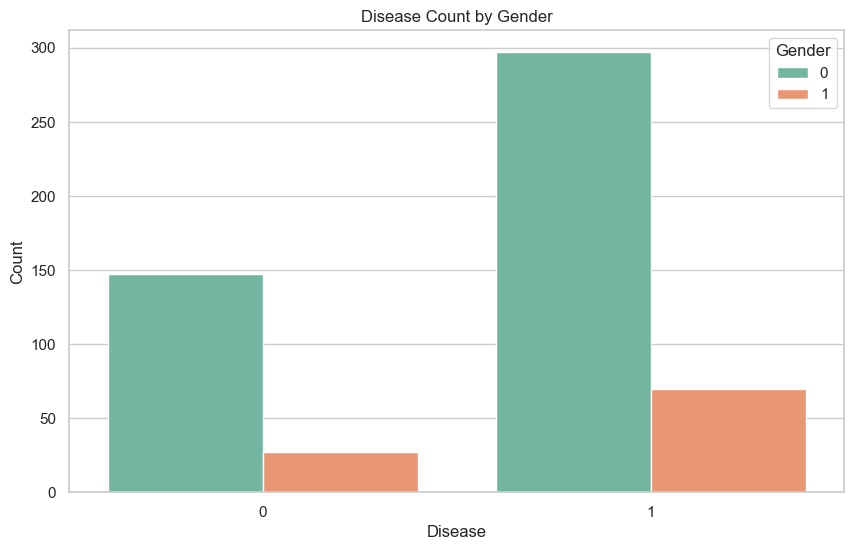

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn
sns.set(style="whitegrid")

# Bar plot of disease count by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease_state', hue='Gender', data=df_filtered, palette='Set2')
plt.title('Disease Count by Gender')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

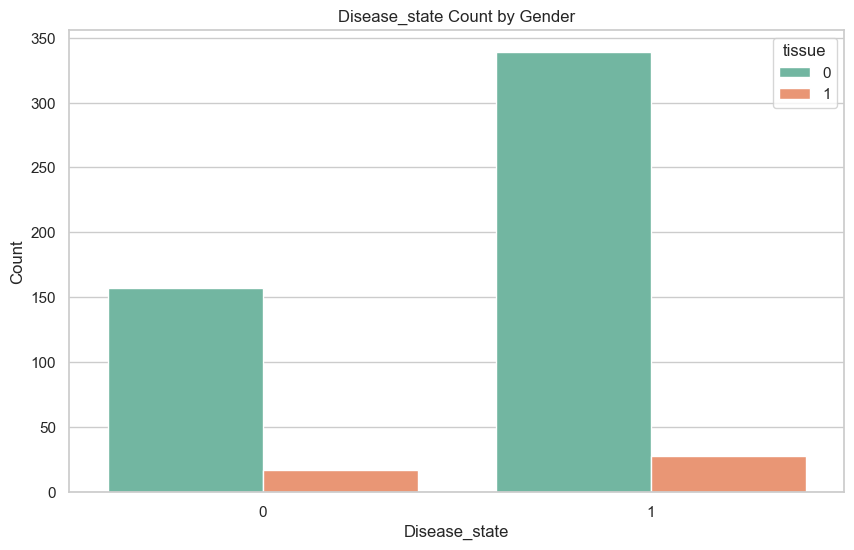

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn
sns.set(style="whitegrid")

# Bar plot of disease count by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease_state', hue='tissue', data=df_filtered, palette='Set2')
plt.title('Disease_state Count by Gender')
plt.xlabel('Disease_state')
plt.ylabel('Count')
plt.legend(title='tissue')
plt.show()

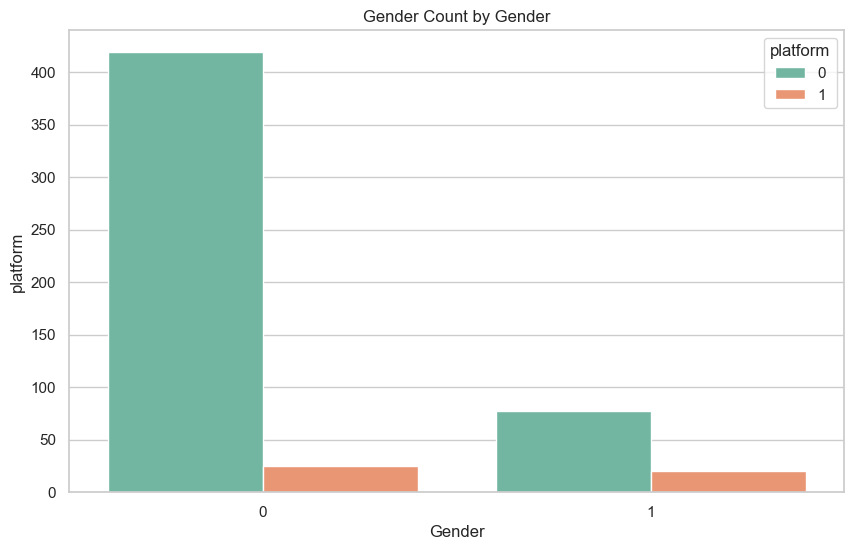

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn
sns.set(style="whitegrid")

# Bar plot of disease count by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='platform', data=df_filtered, palette='Set2')
plt.title('Gender Count by Gender')
plt.xlabel('Gender')
plt.ylabel('platform')
plt.legend(title='platform')
plt.show()

In [232]:
!pip install pandas numpy rpy2

In [14]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# Activate pandas to R conversion
pandas2ri.activate()

# Import R packages
limma = importr('limma')
base = importr('base')
stats = importr('stats')

In [15]:
df_filtered

,batch,sample,Gender,Disease_state,platform,tissue,DDR1,RFC2,HSPA6,PAX8,...,RNF126P1,FBXO31,TUBBP5,SLC44A1,TBCEL,NPEPL1,RBM12B,GALR3,MINOS1-NBL1,MROH7-TTC4
0,1,GSM2449608,Female,Control,GPL570,Blood,2.928353,2.681279,3.200373,3.008607,...,2.624859,2.736003,2.069594,2.216733,2.133581,2.644589,2.503521,2.768501,2.902807,2.950347
1,1,GSM2449609,Female,Control,GPL570,Blood,2.919860,2.642563,3.187529,2.991917,...,2.676496,2.777428,1.977371,2.089180,2.113481,2.676652,2.567890,2.725094,2.862354,2.954725
2,1,GSM2449610,Female,Control,GPL570,Blood,2.862128,2.689835,3.253123,2.971649,...,2.609112,2.720926,1.990827,2.276939,2.175114,2.576388,2.465445,2.771164,2.909786,2.966098
3,1,GSM2449611,Female,Control,GPL570,Blood,2.889364,2.705528,3.333800,3.020300,...,2.636405,2.703822,2.106693,2.162562,2.317124,2.625083,2.265046,2.732430,2.861810,2.958894
4,1,GSM2449612,Female,Control,GPL570,Blood,2.920884,2.733763,3.266168,2.980154,...,2.507453,2.749563,1.939392,2.258863,2.248618,2.687284,2.531366,2.750591,2.897746,2.940008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,8.655209,7.431121,8.700752,10.113026,...,6.577671,7.126281,4.336341,5.998381,6.113050,7.554481,5.249426,7.802167,11.379362,9.049751
556,5,GSM303523,Female,RA,GPL96,synovial_membrane,8.841976,7.277250,8.234683,9.800434,...,5.944969,5.988112,5.164798,4.749352,6.594829,8.940687,6.609307,6.646177,13.511456,8.360654
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,8.889370,7.637270,8.803172,9.716394,...,6.518371,7.221036,4.485807,5.947718,6.000559,9.543925,5.079634,6.120532,13.139505,8.224006
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,8.851196,7.001431,8.887422,10.197770,...,6.360350,7.374926,4.834696,7.143159,6.299750,9.620854,6.021862,5.761626,13.128373,8.319234


In [16]:
# Separate gene expression data
sample_metadata = df_filtered.iloc[:, 1:6]  # Adjust column indices based on your dataset

# Separate sample metadata
expression_data = df_filtered.iloc[:, 6:]  # Adjust column indices based on your dataset

# Display the separated data
print("Expression Data:")
print(expression_data.head())

print("\nSample Metadata:")
print(sample_metadata.head())

Expression Data:
       DDR1      RFC2     HSPA6      PAX8    GUCA1A   MIR5193      THRA  \
0  2.928353  2.681279  3.200373  3.008607  1.814431  3.035352  2.794960   
1  2.919860  2.642563  3.187529  2.991917  1.766750  3.072702  2.880967   
2  2.862128  2.689835  3.253123  2.971649  1.773704  3.045336  2.872246   
3  2.889364  2.705528  3.333800  3.020300  1.750219  3.086978  2.900855   
4  2.920884  2.733763  3.266168  2.980154  1.768860  3.085212  2.806505   

     PTPN21      CCL5    CYP2E1  ...  RNF126P1    FBXO31    TUBBP5   SLC44A1  \
0  1.993711  3.573319  1.875712  ...  2.624859  2.736003  2.069594  2.216733   
1  2.036722  3.561053  1.895540  ...  2.676496  2.777428  1.977371  2.089180   
2  1.892788  3.585422  1.928704  ...  2.609112  2.720926  1.990827  2.276939   
3  2.033047  3.598813  1.828633  ...  2.636405  2.703822  2.106693  2.162562   
4  1.898818  3.527495  1.766527  ...  2.507453  2.749563  1.939392  2.258863   

      TBCEL    NPEPL1    RBM12B     GALR3  MINOS1-N

In [17]:
# Convert expression data to an R matrix
expression_matrix = pandas2ri.py2rpy(expression_data)

# Convert sample metadata to an R data frame
sample_metadata_r = pandas2ri.py2rpy(sample_metadata)



In [18]:
# Transpose the expression data
expression_data = expression_data.T

# Display the transposed data
print(expression_data.head())

             0         1         2         3         4         5         6    \
DDR1    2.928353  2.919860  2.862128  2.889364  2.920884  2.870000  2.927075   
RFC2    2.681279  2.642563  2.689835  2.705528  2.733763  2.726157  2.636703   
HSPA6   3.200373  3.187529  3.253123  3.333800  3.266168  3.275608  3.190540   
PAX8    3.008607  2.991917  2.971649  3.020300  2.980154  2.990279  2.971847   
GUCA1A  1.814431  1.766750  1.773704  1.750219  1.768860  1.678898  1.837825   

             7         8         9    ...       544        550       551  \
DDR1    2.881789  2.887258  2.931180  ...  8.804509   8.847455  8.804993   
RFC2    2.667755  2.666491  2.649811  ...  7.999233   7.004086  6.643165   
HSPA6   3.253989  3.256648  3.274433  ...  7.351831   8.359890  8.936423   
PAX8    2.996316  2.954876  2.995680  ...  9.817929  10.091396  9.723927   
GUCA1A  1.840322  1.772330  1.761832  ...  5.933025   7.057429  6.341674   

              552        554        555       556       557   

In [146]:
# Convert expression data to an R matrix
expression_matrix = pandas2ri.py2rpy(expression_data)

# Convert sample metadata to an R data frame
sample_metadata_r = pandas2ri.py2rpy(sample_metadata)

In [147]:
# Create a design matrix with multiple factors
design_formula = ro.Formula('~ Disease_state')
design = stats.model_matrix(design_formula, data=sample_metadata_r)


# Display the design matrix
design

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [96]:
print(design)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [97]:
design

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [98]:
# Fit the linear model
fit = limma.lmFit(expression_matrix, design)
fit = limma.eBayes(fit)



In [99]:
# Extract top differentially expressed genes
top_genes = limma.topTable(fit, coef=2, number=base.nrow(expression_matrix))

# Convert the result back to a pandas DataFrame
top_genes_df = pandas2ri.rpy2py(top_genes)

# Display the top genes
print(top_genes_df)

             logFC   AveExpr         t       P.Value     adj.P.Val          B
ALAS2     0.493240  2.943534  7.965663  9.719997e-15  1.249603e-10  22.567602
RCAN3    -0.459312  2.670478 -7.790967  3.406944e-14  2.189984e-10  21.386534
PKD2L2   -0.446402  2.235535 -7.126822  3.289548e-12  1.409681e-08  17.088349
HIST1H1E -0.374711  2.771702 -6.994159  7.886083e-12  2.534587e-08  16.267215
HBQ1      0.314868  2.844705  6.784757  3.052203e-11  7.847824e-08  14.997172
...            ...       ...       ...           ...           ...        ...
NPTXR    -0.000027  2.419769 -0.000371  9.997045e-01  9.999523e-01  -6.192943
ELL3      0.000032  2.880170  0.000258  9.997939e-01  9.999523e-01  -6.192943
OR2B2    -0.000019  2.071560 -0.000188  9.998499e-01  9.999523e-01  -6.192943
FKBP9     0.000035  3.055034  0.000157  9.998746e-01  9.999523e-01  -6.192943
HOMER2   -0.000004  2.223146 -0.000028  9.999774e-01  9.999774e-01  -6.192943

[12856 rows x 6 columns]


In [102]:
# Apply log2FC and p-value cutoffs
log2fc_cutoff = 0.005# |log2FC| > 1
p_value_cutoff = 0.05 # adj.P.Val < 0.05

# Filter the results
filtered_genes = top_genes_df[
    (abs(top_genes_df['logFC']) > log2fc_cutoff) & 
    (top_genes_df['adj.P.Val'] < p_value_cutoff)
]

# Display the filtered results
print("Filtered Genes:")
filtered_genes

Filtered Genes:


,logFC,AveExpr,t,P.Value,adj.P.Val,B
ALAS2,0.493240,2.943534,7.965663,9.719997e-15,1.249603e-10,22.567602
RCAN3,-0.459312,2.670478,-7.790967,3.406944e-14,2.189984e-10,21.386534
PKD2L2,-0.446402,2.235535,-7.126822,3.289548e-12,1.409681e-08,17.088349
HIST1H1E,-0.374711,2.771702,-6.994159,7.886083e-12,2.534587e-08,16.267215
HBQ1,0.314868,2.844705,6.784757,3.052203e-11,7.847824e-08,14.997172
...,...,...,...,...,...,...
APOBEC3A,0.422828,2.968177,3.249783,1.226513e-03,4.927514e-02,-1.170002
MYH3,-0.112178,2.247792,-3.246354,1.241094e-03,4.958589e-02,-1.180491
ANGEL2,-0.273992,2.674671,-3.246152,1.241962e-03,4.958589e-02,-1.181111
CDKN2B,-0.140293,2.100165,-3.243945,1.251437e-03,4.980953e-02,-1.187855


In [491]:
filtered_genes.to_csv("/Users/swetarai/GSE_merging_data/sex_specific_topgenes.csv")

Filtered Genes:
             logFC   AveExpr         t       P.Value  adj.P.Val          B  \
HTATSF1  -0.502220  2.761879 -6.136730  1.626683e-09   0.000002  11.274238   
SPTBN1   -0.602269  2.805038 -6.061539  2.526060e-09   0.000003  10.863037   
TRIM58    0.614476  2.643215  5.881096  7.131565e-09   0.000006   9.894242   
NR4A2    -0.712702  3.039825 -5.739235  1.583453e-08   0.000011   9.150590   
XK        0.524344  2.629957  5.459333  7.283943e-08   0.000035   7.730424   
TNFRSF17  0.593462  2.452922  5.030390  6.665087e-07   0.000170   5.677562   
FKBP5    -0.507351  2.997555 -4.999587  7.767705e-07   0.000188   5.535980   
FFAR2     0.507736  3.060787  4.900257  1.265720e-06   0.000268   5.084817   
AREG     -0.509633  2.287611 -4.715603  3.068595e-06   0.000556   4.268096   
FOSB     -0.747514  3.255956 -4.489002  8.744905e-06   0.001323   3.305281   
SLC25A16 -0.543014  2.749168 -4.448014  1.051943e-05   0.001492   3.135804   
CCDC7    -0.505737  2.404385 -4.281926  2.191418

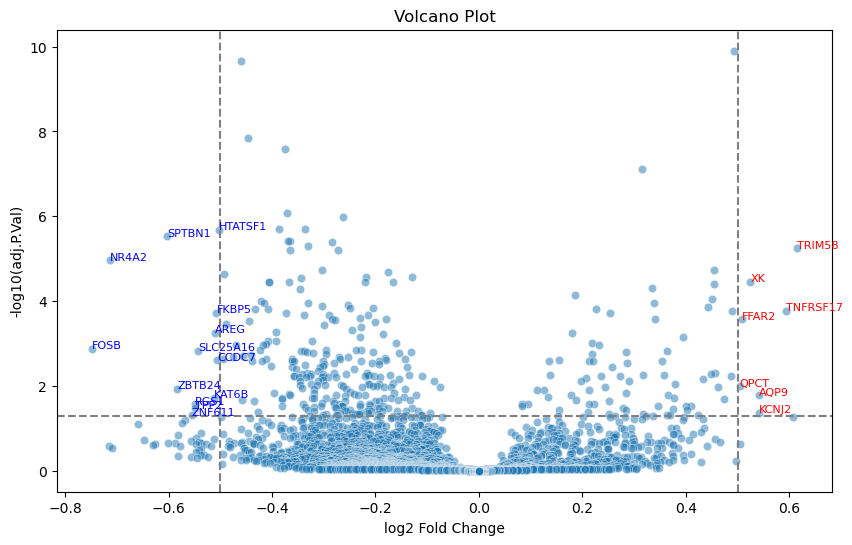

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming top_genes_df is your DataFrame with columns 'logFC' and 'adj.P.Val'

# Add a placeholder gene column using row indices
top_genes_df['Gene'] = top_genes_df.index.astype(str)  # Use row indices as gene names

# Apply log2FC and p-value cutoffs
log2fc_cutoff = 0.5  # |log2FC| > 1
p_value_cutoff = 0.05  # adj.P.Val < 0.05

# Filter the results
filtered_genes = top_genes_df[
    (abs(top_genes_df['logFC']) > log2fc_cutoff) & 
    (top_genes_df['adj.P.Val'] < p_value_cutoff)
]

# Display the filtered results
print("Filtered Genes:")
print(filtered_genes)

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='logFC', y=-np.log10(top_genes_df['adj.P.Val']), data=top_genes_df, alpha=0.5)

# Add cutoffs
plt.axvline(-log2fc_cutoff, color='grey', linestyle='--')
plt.axvline(log2fc_cutoff, color='grey', linestyle='--')
plt.axhline(-np.log10(p_value_cutoff), color='grey', linestyle='--')

# Annotate upregulated and downregulated genes
upregulated_genes = filtered_genes[filtered_genes['logFC'] > log2fc_cutoff]
downregulated_genes = filtered_genes[filtered_genes['logFC'] < -log2fc_cutoff]

for i, row in upregulated_genes.iterrows():
    plt.text(row['logFC'], -np.log10(row['adj.P.Val']), row['Gene'], fontsize=8, color='red')  # Annotate upregulated genes

for i, row in downregulated_genes.iterrows():
    plt.text(row['logFC'], -np.log10(row['adj.P.Val']), row['Gene'], fontsize=8, color='blue')  # Annotate downregulated genes

# Label axes
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(adj.P.Val)')
plt.title('Volcano Plot')

# Show plot
plt.show()

In [111]:

# Add a column for regulation status
top_genes_df['Regulation'] = 'Not Significant'  # Default value

# Upregulated genes
top_genes_df.loc[
    (top_genes_df['logFC'] > log2fc_cutoff) & (top_genes_df['adj.P.Val'] < p_value_cutoff), 
    'Regulation'
] = 'Upregulated'

# Downregulated genes
top_genes_df.loc[
    (top_genes_df['logFC'] < -log2fc_cutoff) & (top_genes_df['adj.P.Val'] < p_value_cutoff), 
    'Regulation'
] = 'Downregulated'

In [115]:
# Keep only upregulated and downregulated genes
filtered_genes_df = top_genes_df[
    (top_genes_df['Regulation'] == 'Upregulated') | 
    (top_genes_df['Regulation'] == 'Downregulated')
]

# Display the filtered DataFrame
print("Filtered Genes (Upregulated and Downregulated):")
filtered_genes_df

Filtered Genes (Upregulated and Downregulated):


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene,Regulation
HTATSF1,-0.502220,2.761879,-6.136730,1.626683e-09,0.000002,11.274238,HTATSF1,Downregulated
SPTBN1,-0.602269,2.805038,-6.061539,2.526060e-09,0.000003,10.863037,SPTBN1,Downregulated
TRIM58,0.614476,2.643215,5.881096,7.131565e-09,0.000006,9.894242,TRIM58,Upregulated
NR4A2,-0.712702,3.039825,-5.739235,1.583453e-08,0.000011,9.150590,NR4A2,Downregulated
XK,0.524344,2.629957,5.459333,7.283943e-08,0.000035,7.730424,XK,Upregulated
TNFRSF17,0.593462,2.452922,5.030390,6.665087e-07,0.000170,5.677562,TNFRSF17,Upregulated
FKBP5,-0.507351,2.997555,-4.999587,7.767705e-07,0.000188,5.535980,FKBP5,Downregulated
FFAR2,0.507736,3.060787,4.900257,1.265720e-06,0.000268,5.084817,FFAR2,Upregulated
AREG,-0.509633,2.287611,-4.715603,3.068595e-06,0.000556,4.268096,AREG,Downregulated
FOSB,-0.747514,3.255956,-4.489002,8.744905e-06,0.001323,3.305281,FOSB,Downregulated


# gender specific

In [19]:
# Filter male data
male_data = df_filtered[df_filtered['Gender'] == 'Male']

# Filter female data
female_data = df_filtered[df_filtered['Gender'] == 'Female']

print(f"Male dataset size: {male_data.shape}")
print(f"Female dataset size: {female_data.shape}")


Male dataset size: (97, 12862)
Female dataset size: (444, 12862)


In [20]:
# Separate gene expression data
sample_metadata1 = male_data.iloc[:, 1:6]  # Adjust column indices based on your dataset

# Separate sample metadata
expression_data1 = male_data.iloc[:, 6:]  # Adjust column indices based on your dataset

# Display the separated data
print("Expression Data:")
print(expression_data1.head())

print("\nSample Metadata:")
print(sample_metadata1.head())

Expression Data:
        DDR1      RFC2     HSPA6      PAX8    GUCA1A   MIR5193      THRA  \
38  2.860769  2.796153  3.356864  2.911472  1.805056  3.063531  2.701166   
49  2.877973  2.784308  3.296903  2.947397  1.825649  3.081012  2.786289   
54  2.883070  2.829047  3.237908  2.984294  1.786429  3.035521  2.739792   
57  2.786111  2.708391  3.247418  2.897853  1.896979  3.036567  2.716857   
59  2.883136  2.753396  3.325073  2.986236  1.780912  3.064377  2.624100   

      PTPN21      CCL5    CYP2E1  ...  RNF126P1    FBXO31    TUBBP5   SLC44A1  \
38  1.877680  3.434801  1.809047  ...  2.598661  2.665627  2.077434  2.238082   
49  1.894410  3.529021  1.818879  ...  2.579215  2.709965  1.950133  2.172172   
54  1.863712  3.498087  1.806884  ...  2.537538  2.710802  2.153065  2.400354   
57  1.938898  3.585561  1.861035  ...  2.521444  2.704293  2.021408  2.127251   
59  1.990307  3.471467  1.910687  ...  2.610818  2.707697  1.989800  2.275958   

       TBCEL    NPEPL1    RBM12B     GA

In [21]:
# Convert expression data to an R matrix
expression_matrix1 = pandas2ri.py2rpy(expression_data1)

# Convert sample metadata to an R data frame
sample_metadata_r1 = pandas2ri.py2rpy(sample_metadata1)

# Transpose the expression data
expression_data1 = expression_data1.T

# Display the transposed data
print(expression_data1.head())

# Convert expression data to an R matrix
expression_matrix1 = pandas2ri.py2rpy(expression_data1)

# Convert sample metadata to an R data frame
sample_metadata_r1 = pandas2ri.py2rpy(sample_metadata1)

             38        49        54        57        59        60        61   \
DDR1    2.860769  2.877973  2.883070  2.786111  2.883136  2.932132  2.868189   
RFC2    2.796153  2.784308  2.829047  2.708391  2.753396  2.755715  2.745364   
HSPA6   3.356864  3.296903  3.237908  3.247418  3.325073  3.268966  3.216700   
PAX8    2.911472  2.947397  2.984294  2.897853  2.986236  3.012606  2.969510   
GUCA1A  1.805056  1.825649  1.786429  1.896979  1.780912  1.787282  1.740559   

             62        63        64   ...        517       529        530  \
DDR1    2.952054  2.902711  2.904345  ...   8.507002  8.830379   8.573325   
RFC2    2.709371  2.801945  2.721248  ...   7.544578  7.027508   7.362882   
HSPA6   3.213710  3.230443  3.288060  ...   9.445015  8.588542   9.246546   
PAX8    2.984707  2.952282  2.990164  ...  10.339405  9.444255  10.035899   
GUCA1A  1.861706  1.820455  1.822156  ...   5.378512  4.800072   5.246347   

              532        533        552        555      

In [22]:
# Create a design matrix with multiple factors
design_formula1 = ro.Formula('~ Disease_state')
design1 = stats.model_matrix(design_formula1, data=sample_metadata_r1)


# Display the design matrix
design1

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.

In [23]:
# Fit the linear model
fit1 = limma.lmFit(expression_matrix1, design1)
fit1 = limma.eBayes(fit1)

# Extract top differentially expressed genes
top_genes1 = limma.topTable(fit1, coef=2, number=base.nrow(expression_matrix1))

# Convert the result back to a pandas DataFrame
top_genes_df1 = pandas2ri.rpy2py(top_genes1)

# Display the top genes
print(top_genes_df1)

              logFC   AveExpr         t       P.Value     adj.P.Val          B
MED1      -1.940175  3.491505 -7.363110  5.438877e-11  6.992221e-07  14.683108
ILF3      -2.117331  3.844841 -7.100073  1.929865e-10  1.037120e-06  13.480248
SRPR      -2.640650  3.731489 -7.052768  2.420162e-10  1.037120e-06  13.265261
C14orf105  1.130943  1.843802  6.861049  6.029362e-10  1.537373e-06  12.398537
TGFBRAP1  -1.844197  3.434322 -6.822361  7.241945e-10  1.537373e-06  12.224570
...             ...       ...       ...           ...           ...        ...
SGPL1      0.003354  2.503199  0.020745  9.834911e-01  9.837972e-01  -6.376645
IL17B     -0.001765  2.157927 -0.017835  9.858063e-01  9.860364e-01  -6.376700
SCN1A     -0.002132  1.878710 -0.011469  9.908720e-01  9.910262e-01  -6.376791
CYP4F8    -0.001183  1.965710 -0.006728  9.946456e-01  9.947229e-01  -6.376834
C8G       -0.000242  2.152849 -0.002259  9.982024e-01  9.982024e-01  -6.376853

[12856 rows x 6 columns]


Filtered Genes:
              logFC   AveExpr         t       P.Value     adj.P.Val  \
MED1      -1.940175  3.491505 -7.363110  5.438877e-11  6.992221e-07   
ILF3      -2.117331  3.844841 -7.100073  1.929865e-10  1.037120e-06   
SRPR      -2.640650  3.731489 -7.052768  2.420162e-10  1.037120e-06   
C14orf105  1.130943  1.843802  6.861049  6.029362e-10  1.537373e-06   
TGFBRAP1  -1.844197  3.434322 -6.822361  7.241945e-10  1.537373e-06   
...             ...       ...       ...           ...           ...   
FOLH1B    -0.501788  2.243876 -2.020395  4.604786e-02  4.776820e-02   
CUX2      -0.429602  2.283689 -2.017580  4.634578e-02  4.806174e-02   
SNTG2     -0.416518  2.118708 -2.012772  4.685848e-02  4.858950e-02   
DTNB      -0.421848  2.980945 -2.005196  4.767626e-02  4.943350e-02   
NUP62CL   -0.429955  2.072141 -2.002181  4.800501e-02  4.977035e-02   

                   B       Gene     Regulation  
MED1       14.683108       MED1  Downregulated  
ILF3       13.480248       ILF3  

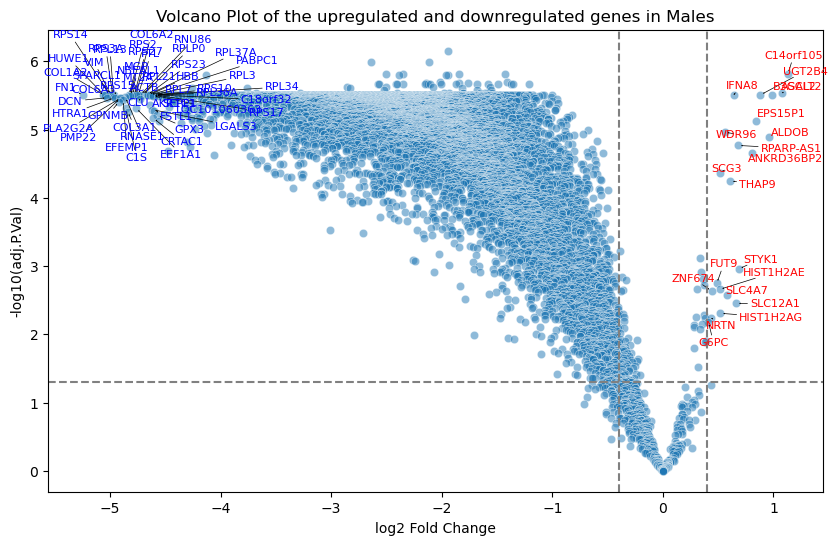

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from adjustText import adjust_text  # Import the adjustText library

# Assuming top_genes_df1 is your DataFrame with columns 'logFC' and 'adj.P.Val'

# Add a placeholder gene column using row indices
top_genes_df1['Gene'] = top_genes_df1.index.astype(str)  # Use row indices as gene names

# Apply log2FC and p-value cutoffs
log2fc_cutoff = 0.4 # |log2FC| > 0.5
p_value_cutoff = 0.05  # adj.P.Val < 0.05

# Filter the results
filtered_genes1 = top_genes_df1[
    (abs(top_genes_df1['logFC']) > log2fc_cutoff) & 
    (top_genes_df1['adj.P.Val'] < p_value_cutoff)
]

# Display the filtered results
print("Filtered Genes:")
print(filtered_genes1)

# Sort upregulated genes by logFC (descending order)
upregulated_genes1_sorted = filtered_genes1[filtered_genes1['logFC'] > log2fc_cutoff].sort_values(by='logFC', ascending=False)

# Sort downregulated genes by logFC (ascending order)
downregulated_genes1_sorted = filtered_genes1[filtered_genes1['logFC'] < -log2fc_cutoff].sort_values(by='logFC', ascending=True)

# Get the top 50 upregulated and downregulated genes
top_50_upregulated = upregulated_genes1_sorted.head(50)
top_50_downregulated = downregulated_genes1_sorted.head(50)

# Display the top 50 upregulated and downregulated genes
print("\nTop 50 Upregulated Genes:")
print(top_50_upregulated[['Gene', 'logFC', 'adj.P.Val']])

print("\nTop 50 Downregulated Genes:")
print(top_50_downregulated[['Gene', 'logFC', 'adj.P.Val']])

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='logFC', y=-np.log10(top_genes_df1['adj.P.Val']), data=top_genes_df1, alpha=0.5)

# Add cutoffs
plt.axvline(-log2fc_cutoff, color='grey', linestyle='--')
plt.axvline(log2fc_cutoff, color='grey', linestyle='--')
plt.axhline(-np.log10(p_value_cutoff), color='grey', linestyle='--')

# Prepare text annotations for upregulated and downregulated genes
texts = []
for i, row in top_50_upregulated.iterrows():
    texts.append(plt.text(row['logFC'], -np.log10(row['adj.P.Val']), row['Gene'], fontsize=8, color='red'))

for i, row in top_50_downregulated.iterrows():
    texts.append(plt.text(row['logFC'], -np.log10(row['adj.P.Val']), row['Gene'], fontsize=8, color='blue'))

# Use adjustText to avoid overlapping labels
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

# Label axes
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(adj.P.Val)')
plt.title('Volcano Plot of the upregulated and downregulated genes in Males')



plt.savefig('/Users/swetarai/GSE_merging_data/volcano_plot_male.png', dpi=300, bbox_inches='tight') 
# Show plot
plt.show()

In [39]:

# Add a column for regulation status
top_genes_df1['Regulation'] = 'Not Significant'  # Default value

# Upregulated genes
top_genes_df1.loc[
    (top_genes_df1['logFC'] > log2fc_cutoff) & (top_genes_df1['adj.P.Val'] < p_value_cutoff), 
    'Regulation'
] = 'Upregulated'

# Downregulated genes
top_genes_df1.loc[
    (top_genes_df1['logFC'] < -log2fc_cutoff) & (top_genes_df1['adj.P.Val'] < p_value_cutoff), 
    'Regulation'
] = 'Downregulated'



In [40]:
# Keep only upregulated and downregulated genes
filtered_genes_df1 = top_genes_df1[
    (top_genes_df1['Regulation'] == 'Upregulated') | 
    (top_genes_df1['Regulation'] == 'Downregulated')
]

# Display the filtered DataFrame
print("Filtered Genes (Upregulated and Downregulated):")
filtered_genes_df1

Filtered Genes (Upregulated and Downregulated):


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene,Regulation
MED1,-1.940175,3.491505,-7.363110,5.438877e-11,6.992221e-07,14.683108,MED1,Downregulated
ILF3,-2.117331,3.844841,-7.100073,1.929865e-10,1.037120e-06,13.480248,ILF3,Downregulated
SRPR,-2.640650,3.731489,-7.052768,2.420162e-10,1.037120e-06,13.265261,SRPR,Downregulated
C14orf105,1.130943,1.843802,6.861049,6.029362e-10,1.537373e-06,12.398537,C14orf105,Upregulated
TGFBRAP1,-1.844197,3.434322,-6.822361,7.241945e-10,1.537373e-06,12.224570,TGFBRAP1,Downregulated
...,...,...,...,...,...,...,...,...
FOLH1B,-0.501788,2.243876,-2.020395,4.604786e-02,4.776820e-02,-4.415037,FOLH1B,Downregulated
CUX2,-0.429602,2.283689,-2.017580,4.634578e-02,4.806174e-02,-4.420387,CUX2,Downregulated
SNTG2,-0.416518,2.118708,-2.012772,4.685848e-02,4.858950e-02,-4.429511,SNTG2,Downregulated
DTNB,-0.421848,2.980945,-2.005196,4.767626e-02,4.943350e-02,-4.443847,DTNB,Downregulated


# female

In [41]:
# Separate gene expression data
sample_metadata2 = female_data.iloc[:, 1:6]  # Adjust column indices based on your dataset

# Separate sample metadata
expression_data2 = female_data.iloc[:, 6:]  # Adjust column indices based on your dataset

# Display the separated data
print("Expression Data:")
print(expression_data2.head())

print("\nSample Metadata:")
print(sample_metadata2.head())

Expression Data:
       DDR1      RFC2     HSPA6      PAX8    GUCA1A   MIR5193      THRA  \
0  2.928353  2.681279  3.200373  3.008607  1.814431  3.035352  2.794960   
1  2.919860  2.642563  3.187529  2.991917  1.766750  3.072702  2.880967   
2  2.862128  2.689835  3.253123  2.971649  1.773704  3.045336  2.872246   
3  2.889364  2.705528  3.333800  3.020300  1.750219  3.086978  2.900855   
4  2.920884  2.733763  3.266168  2.980154  1.768860  3.085212  2.806505   

     PTPN21      CCL5    CYP2E1  ...  RNF126P1    FBXO31    TUBBP5   SLC44A1  \
0  1.993711  3.573319  1.875712  ...  2.624859  2.736003  2.069594  2.216733   
1  2.036722  3.561053  1.895540  ...  2.676496  2.777428  1.977371  2.089180   
2  1.892788  3.585422  1.928704  ...  2.609112  2.720926  1.990827  2.276939   
3  2.033047  3.598813  1.828633  ...  2.636405  2.703822  2.106693  2.162562   
4  1.898818  3.527495  1.766527  ...  2.507453  2.749563  1.939392  2.258863   

      TBCEL    NPEPL1    RBM12B     GALR3  MINOS1-N

In [42]:
# Convert expression data to an R matrix
expression_matrix2 = pandas2ri.py2rpy(expression_data2)

# Convert sample metadata to an R data frame
sample_metadata_r2 = pandas2ri.py2rpy(sample_metadata2)

# Transpose the expression data
expression_data2 = expression_data2.T

# Display the transposed data
print(expression_data2.head())

# Convert expression data to an R matrix
expression_matrix2 = pandas2ri.py2rpy(expression_data2)

# Convert sample metadata to an R data frame
sample_metadata_r2 = pandas2ri.py2rpy(sample_metadata2)

             0         1         2         3         4         5         6    \
DDR1    2.928353  2.919860  2.862128  2.889364  2.920884  2.870000  2.927075   
RFC2    2.681279  2.642563  2.689835  2.705528  2.733763  2.726157  2.636703   
HSPA6   3.200373  3.187529  3.253123  3.333800  3.266168  3.275608  3.190540   
PAX8    3.008607  2.991917  2.971649  3.020300  2.980154  2.990279  2.971847   
GUCA1A  1.814431  1.766750  1.773704  1.750219  1.768860  1.678898  1.837825   

             7         8         9    ...        538       539        540  \
DDR1    2.881789  2.887258  2.931180  ...   8.848895  8.818323   8.438401   
RFC2    2.667755  2.666491  2.649811  ...   6.957032  7.561731   7.933555   
HSPA6   3.253989  3.256648  3.274433  ...   8.547951  7.302255   7.677022   
PAX8    2.996316  2.954876  2.995680  ...  10.563025  9.660882  10.206245   
GUCA1A  1.840322  1.772330  1.761832  ...   6.126678  4.241566   5.511079   

             542       543       544        550       55

In [43]:
# Create a design matrix with multiple factors
design_formula2 = ro.Formula('~ Disease_state')
design2 = stats.model_matrix(design_formula2, data=sample_metadata_r2)


# Display the design matrix
design2

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [44]:
# Fit the linear model
fit2 = limma.lmFit(expression_matrix2, design2)
fit2 = limma.eBayes(fit2)

# Extract top differentially expressed genes
top_genes2 = limma.topTable(fit2, coef=2, number=base.nrow(expression_matrix2))

# Convert the result back to a pandas DataFrame
top_genes_df2 = pandas2ri.rpy2py(top_genes2)

# Display the top genes
print(top_genes_df2)

                 logFC   AveExpr         t       P.Value     adj.P.Val  \
ALAS2         0.625646  2.975739  9.761622  1.582403e-20  2.034337e-16   
CXCR1         0.480432  2.985226  9.637093  4.333942e-20  2.785858e-16   
CCR3          0.732791  2.825018  9.195305  1.445474e-18  6.194338e-15   
CLC           0.812070  2.960142  9.100331  3.029252e-18  9.736016e-15   
HIST1H1E     -0.463688  2.745838 -8.991435  7.031221e-18  1.807867e-14   
...                ...       ...       ...           ...           ...   
DNAJC13       0.001653  2.703837  0.010197  9.918688e-01  9.921775e-01   
SLC6A7        0.000207  2.353019  0.007654  9.938964e-01  9.941284e-01   
CCDC134       0.000377  2.458138  0.007524  9.939999e-01  9.941546e-01   
LOC101929740 -0.000300  2.216431 -0.003793  9.969752e-01  9.970528e-01   
CRYGC        -0.000150  2.442200 -0.002108  9.983194e-01  9.983194e-01   

                      B  
ALAS2         35.729352  
CXCR1         34.755980  
CCR3          31.368969  
CLC    

Filtered Genes:
             logFC   AveExpr         t       P.Value     adj.P.Val          B  \
ALAS2     0.625646  2.975739  9.761622  1.582403e-20  2.034337e-16  35.729352   
CXCR1     0.480432  2.985226  9.637093  4.333942e-20  2.785858e-16  34.755980   
CCR3      0.732791  2.825018  9.195305  1.445474e-18  6.194338e-15  31.368969   
CLC       0.812070  2.960142  9.100331  3.029252e-18  9.736016e-15  30.654708   
HIST1H1E -0.463688  2.745838 -8.991435  7.031221e-18  1.807867e-14  29.841952   
...            ...       ...       ...           ...           ...        ...   
RPL19     0.482879  4.243174  2.129574  3.375463e-02  4.927325e-02  -4.300086   
HSPA5     0.427992  3.844301  2.128433  3.384955e-02  4.938938e-02  -4.302443   
HMGN3     0.415690  3.745141  2.126027  3.405058e-02  4.961512e-02  -4.307412   
EEF2      0.450148  4.146846  2.124956  3.414034e-02  4.971773e-02  -4.309620   
SRP14     0.442835  3.958789  2.123445  3.426736e-02  4.987447e-02  -4.312735   

           

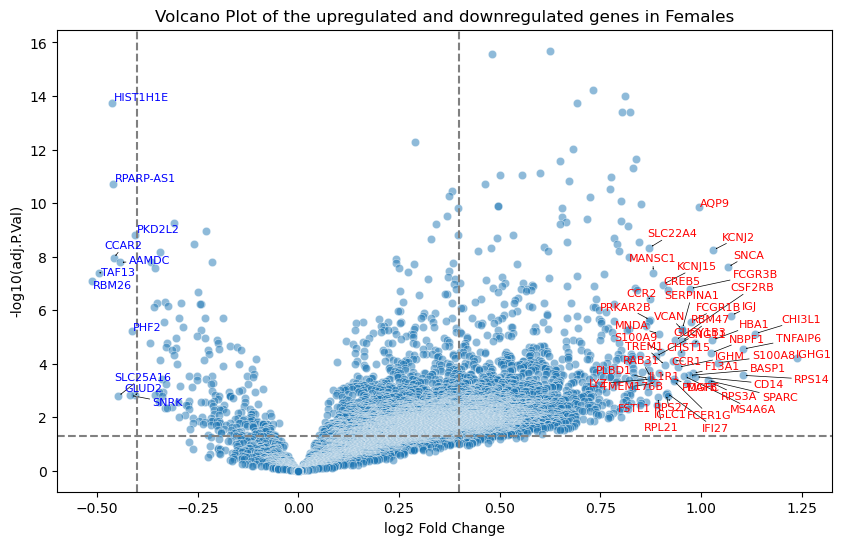

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from adjustText import adjust_text  # Import the adjustText library

# Assuming top_genes_df1 is your DataFrame with columns 'logFC' and 'adj.P.Val'

# Add a placeholder gene column using row indices
top_genes_df2['Gene'] = top_genes_df2.index.astype(str)  # Use row indices as gene names

# Apply log2FC and p-value cutoffs
log2fc_cutoff = 0.4# |log2FC| > 0.5
p_value_cutoff = 0.05  # adj.P.Val < 0.05

# Filter the results
filtered_genes2 = top_genes_df2[
    (abs(top_genes_df2['logFC']) > log2fc_cutoff) & 
    (top_genes_df2['adj.P.Val'] < p_value_cutoff)
]

# Display the filtered results
print("Filtered Genes:")
print(filtered_genes2)

# Sort upregulated genes by logFC (descending order)
upregulated_genes2_sorted = filtered_genes2[filtered_genes2['logFC'] > log2fc_cutoff].sort_values(by='logFC', ascending=False)

# Sort downregulated genes by logFC (ascending order)
downregulated_genes2_sorted = filtered_genes2[filtered_genes2['logFC'] < -log2fc_cutoff].sort_values(by='logFC', ascending=True)

# Get the top 50 upregulated and downregulated genes
top_50_upregulated1 = upregulated_genes2_sorted.head(50)
top_50_downregulated1 = downregulated_genes2_sorted.head(50)

# Display the top 50 upregulated and downregulated genes
print("\nTop 50 Upregulated Genes:")
print(top_50_upregulated1[['Gene', 'logFC', 'adj.P.Val']])

print("\nTop 50 Downregulated Genes:")
print(top_50_downregulated1[['Gene', 'logFC', 'adj.P.Val']])

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='logFC', y=-np.log10(top_genes_df2['adj.P.Val']), data=top_genes_df2, alpha=0.5)

# Add cutoffs
plt.axvline(-log2fc_cutoff, color='grey', linestyle='--')
plt.axvline(log2fc_cutoff, color='grey', linestyle='--')
plt.axhline(-np.log10(p_value_cutoff), color='grey', linestyle='--')

# Prepare text annotations for upregulated and downregulated genes
texts = []
for i, row in top_50_upregulated1.iterrows():
    texts.append(plt.text(row['logFC'], -np.log10(row['adj.P.Val']), row['Gene'], fontsize=8, color='red'))

for i, row in top_50_downregulated1.iterrows():
    texts.append(plt.text(row['logFC'], -np.log10(row['adj.P.Val']), row['Gene'], fontsize=8, color='blue'))

# Use adjustText to avoid overlapping labels
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

# Label axes
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(adj.P.Val)')
plt.title('Volcano Plot of the upregulated and downregulated genes in Females')
plt.savefig('/Users/swetarai/GSE_merging_data/volcano_plot_female.png', dpi=300, bbox_inches='tight') 
# Show plot
plt.show()

In [46]:

# Add a column for regulation status
top_genes_df2['Regulation'] = 'Not Significant'  # Default value

# Upregulated genes
top_genes_df2.loc[
    (top_genes_df2['logFC'] > log2fc_cutoff) & (top_genes_df2['adj.P.Val'] < p_value_cutoff), 
    'Regulation'
] = 'Upregulated'

# Downregulated genes
top_genes_df2.loc[
    (top_genes_df2['logFC'] < -log2fc_cutoff) & (top_genes_df2['adj.P.Val'] < p_value_cutoff), 
    'Regulation'
] = 'Downregulated'




# Keep only upregulated and downregulated genes
filtered_genes_df2 = top_genes_df2[
    (top_genes_df2['Regulation'] == 'Upregulated') | 
    (top_genes_df2['Regulation'] == 'Downregulated')
]

# Display the filtered DataFrame
print("Filtered Genes (Upregulated and Downregulated):")
filtered_genes_df2

Filtered Genes (Upregulated and Downregulated):


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene,Regulation
ALAS2,0.625646,2.975739,9.761622,1.582403e-20,2.034337e-16,35.729352,ALAS2,Upregulated
CXCR1,0.480432,2.985226,9.637093,4.333942e-20,2.785858e-16,34.755980,CXCR1,Upregulated
CCR3,0.732791,2.825018,9.195305,1.445474e-18,6.194338e-15,31.368969,CCR3,Upregulated
CLC,0.812070,2.960142,9.100331,3.029252e-18,9.736016e-15,30.654708,CLC,Upregulated
HIST1H1E,-0.463688,2.745838,-8.991435,7.031221e-18,1.807867e-14,29.841952,HIST1H1E,Downregulated
...,...,...,...,...,...,...,...,...
RPL19,0.482879,4.243174,2.129574,3.375463e-02,4.927325e-02,-4.300086,RPL19,Upregulated
HSPA5,0.427992,3.844301,2.128433,3.384955e-02,4.938938e-02,-4.302443,HSPA5,Upregulated
HMGN3,0.415690,3.745141,2.126027,3.405058e-02,4.961512e-02,-4.307412,HMGN3,Upregulated
EEF2,0.450148,4.146846,2.124956,3.414034e-02,4.971773e-02,-4.309620,EEF2,Upregulated


In [49]:
significant_genes1 = filtered_genes_df1.index  


In [54]:
filtered_genes_df1

,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene,Regulation
MED1,-1.940175,3.491505,-7.363110,5.438877e-11,6.992221e-07,14.683108,MED1,Downregulated
ILF3,-2.117331,3.844841,-7.100073,1.929865e-10,1.037120e-06,13.480248,ILF3,Downregulated
SRPR,-2.640650,3.731489,-7.052768,2.420162e-10,1.037120e-06,13.265261,SRPR,Downregulated
C14orf105,1.130943,1.843802,6.861049,6.029362e-10,1.537373e-06,12.398537,C14orf105,Upregulated
TGFBRAP1,-1.844197,3.434322,-6.822361,7.241945e-10,1.537373e-06,12.224570,TGFBRAP1,Downregulated
...,...,...,...,...,...,...,...,...
FOLH1B,-0.501788,2.243876,-2.020395,4.604786e-02,4.776820e-02,-4.415037,FOLH1B,Downregulated
CUX2,-0.429602,2.283689,-2.017580,4.634578e-02,4.806174e-02,-4.420387,CUX2,Downregulated
SNTG2,-0.416518,2.118708,-2.012772,4.685848e-02,4.858950e-02,-4.429511,SNTG2,Downregulated
DTNB,-0.421848,2.980945,-2.005196,4.767626e-02,4.943350e-02,-4.443847,DTNB,Downregulated


In [50]:
significant_genes2 = filtered_genes_df2.index  

In [55]:
import pandas as pd


# Check if all genes in significant_genes exist in the dataset
missing_genes1 = [gene for gene in significant_genes1 if gene not in male_data.columns]
if missing_genes1:
    print("Missing genes in dataset:", missing_genes1)

# Keep only genes that exist in the dataset
significant_genes1 = [gene for gene in significant_genes1 if gene in male_data.columns]

# Metadata columns
metadata_columns1 = ['batch', 'sample', 'Gender', 'Disease_state', 'platform', 'tissue']

# Combine metadata columns with filtered gene columns
columns_to_keep1 = metadata_columns1 + significant_genes1

# Filter the dataset
filtered_dataset1 = male_data[columns_to_keep1]

filtered_dataset1

,batch,sample,Gender,Disease_state,platform,tissue,MED1,ILF3,SRPR,C14orf105,...,LPPR3,ANKRD1,LIN7A,KCNN3,PAK7,FOLH1B,CUX2,SNTG2,DTNB,NUP62CL
38,1,GSM2449646,Male,RA,GPL570,Blood,2.772593,3.011303,2.788630,1.989040,...,2.370107,1.854917,2.871894,2.052923,1.548553,1.979227,2.084748,1.930118,2.424142,1.782168
49,1,GSM2449657,Male,RA,GPL570,Blood,2.841975,3.045412,2.731947,2.089096,...,2.325211,1.804711,2.690146,2.075393,1.642102,1.970536,2.147259,1.989140,2.534240,1.707917
54,1,GSM2449662,Male,RA,GPL570,Blood,2.844527,3.020269,2.812538,2.129673,...,2.522555,1.879815,2.764542,2.214828,1.534112,1.997054,1.966838,2.000562,2.503964,1.734959
57,1,GSM2449665,Male,RA,GPL570,Blood,2.882102,3.035657,2.803698,2.125800,...,2.358654,1.846904,2.660195,2.076003,1.635627,1.948943,2.113724,1.935453,2.422482,2.061379
59,1,GSM2449667,Male,RA,GPL570,Blood,2.826267,2.956759,2.751957,2.169132,...,2.443256,1.855689,2.534640,2.048280,1.534171,1.943321,2.137272,1.908308,2.531099,1.785875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,5,GSM303368,Male,RA,GPL96,synovial_membrane,2.347955,3.408114,4.513769,4.388148,...,5.994783,4.626252,5.528196,5.665384,1.046680,5.603232,2.160907,2.853728,6.301125,5.840516
555,5,GSM303522,Male,Control,GPL96,synovial_membrane,6.044020,7.314986,7.920109,-0.715879,...,5.952506,4.612883,3.220458,3.155166,2.026272,5.673929,2.325412,2.686816,3.916496,1.663782
557,5,GSM303525,Male,Control,GPL96,synovial_membrane,8.160739,7.309185,8.741275,-0.140460,...,3.851089,1.904553,5.269778,5.310704,4.537476,3.175375,4.296230,4.710432,4.636654,4.684869
558,5,GSM303531,Male,Control,GPL96,synovial_membrane,7.941494,8.061576,8.781471,0.320334,...,4.176730,5.231083,2.553560,4.044464,4.925629,3.058890,2.022801,4.020413,4.614086,1.352612


In [56]:
import pandas as pd


# Check if all genes in significant_genes exist in the dataset
missing_genes2= [gene for gene in significant_genes2 if gene not in female_data.columns]
if missing_genes2:
    print("Missing genes in dataset:", missing_genes2)

# Keep only genes that exist in the dataset
significant_genes2 = [gene for gene in significant_genes2 if gene in female_data.columns]

# Metadata columns
metadata_columns2 = ['batch', 'sample', 'Gender', 'Disease_state', 'platform', 'tissue']

# Combine metadata columns with filtered gene columns
columns_to_keep2 = metadata_columns2 + significant_genes2

# Filter the dataset
filtered_dataset2 = female_data[columns_to_keep2]

filtered_dataset2

,batch,sample,Gender,Disease_state,platform,tissue,ALAS2,CXCR1,CCR3,CLC,...,EIF4G2,CMPK1,RPS3,NME1-NME2,LOC100506248,RPL19,HSPA5,HMGN3,EEF2,SRP14
0,1,GSM2449608,Female,Control,GPL570,Blood,3.598080,3.303898,3.144941,3.382121,...,2.575175,1.900432,3.652128,3.326919,3.595357,3.693705,3.356954,3.271362,3.642125,3.382601
1,1,GSM2449609,Female,Control,GPL570,Blood,3.757816,3.326129,2.956112,3.170733,...,2.621080,1.830480,3.627466,3.288799,3.578051,3.682140,3.350259,3.232241,3.646848,3.329988
2,1,GSM2449610,Female,Control,GPL570,Blood,3.522155,3.218228,2.999074,3.357138,...,2.568264,1.918892,3.656326,3.307165,3.606061,3.684638,3.362593,3.276800,3.642440,3.386520
3,1,GSM2449611,Female,Control,GPL570,Blood,3.552688,3.345515,3.189231,3.481248,...,2.614886,1.889399,3.640744,3.314784,3.595034,3.687109,3.390896,3.230599,3.644485,3.354363
4,1,GSM2449612,Female,Control,GPL570,Blood,3.510829,3.370186,3.140711,3.314781,...,2.576919,1.907648,3.622359,3.314393,3.602765,3.681412,3.375032,3.212690,3.633064,3.314791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,5,GSM303326,Female,RA,GPL96,synovial_membrane,2.336572,2.740587,4.822643,5.725479,...,12.415713,10.914856,13.636069,13.065584,12.921694,13.792739,11.519646,11.796985,12.968091,12.832247
550,5,GSM303364,Female,RA,GPL96,synovial_membrane,3.194040,3.789364,6.613887,5.949750,...,12.501534,11.001338,13.548051,12.244513,12.531632,13.493830,12.226903,12.234228,12.399150,12.389185
551,5,GSM303366,Female,RA,GPL96,synovial_membrane,2.329431,3.565999,3.987403,5.533570,...,12.602054,11.438891,13.379649,12.213129,12.723328,13.306589,11.731574,11.796056,12.603677,12.532066
554,5,GSM303520,Female,RA,GPL96,synovial_membrane,3.040482,3.119560,6.360264,6.410587,...,12.465434,11.087290,13.361629,12.088235,13.061337,13.647492,12.401474,11.160105,12.713631,12.477718


In [64]:
# Find common columns between the two datasets
common_columns = filtered_dataset1.columns.intersection(filtered_dataset2.columns)

# Filter both datasets to keep only common columns
filtered_dataset1_common = filtered_dataset1[common_columns]
filtered_dataset2_common = filtered_dataset2[common_columns]

# Merge the two datasets row-wise
merged_dataset = pd.concat([filtered_dataset1_common, filtered_dataset2_common], axis=0, ignore_index=True)

# Display the merged dataset
merged_dataset.to_csv("/Users/swetarai/GSE_merging_data/common.csv")

In [65]:
filtered_dataset = merged_dataset.drop('sample', axis=1)

In [66]:
filtered_dataset

,batch,Gender,Disease_state,platform,tissue,MAL,ANKRD55,LIMS1,C2orf72,TIPARP,...,CR2,CDA,CLIC3,ASGR1,EPB42,CRTAM,IGH,TLR8,CR1,LTF
0,1,Male,RA,GPL570,Blood,3.224348,2.942489,2.134570,2.679944,3.170735,...,2.465401,3.307518,3.027182,2.930005,3.236031,2.627525,2.742158,3.086678,2.880888,2.711523
1,1,Male,RA,GPL570,Blood,3.253924,2.671563,2.199224,2.667453,3.175187,...,2.699113,3.134939,3.095300,2.843114,3.484746,2.735508,2.692193,3.002863,2.718984,3.259483
2,1,Male,RA,GPL570,Blood,3.188358,2.575567,2.275943,2.734267,3.261184,...,2.291020,3.319807,3.061025,3.010657,3.285202,2.727484,2.749976,3.104752,2.876609,2.982244
3,1,Male,RA,GPL570,Blood,3.222080,2.770451,1.956870,2.672439,3.178785,...,2.570841,3.071241,2.891351,2.927768,3.182855,2.998549,2.633513,2.952509,2.689983,3.229668
4,1,Male,RA,GPL570,Blood,3.238118,2.780191,2.205054,2.721335,3.205963,...,2.645904,3.370429,2.941101,2.959796,3.240767,2.800724,2.648450,3.110414,2.881534,3.072942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,5,Female,RA,GPL96,synovial_membrane,9.134365,6.265994,8.623914,6.011391,9.119315,...,7.648386,5.701433,6.718211,5.031029,3.372270,6.273576,10.724582,4.029585,6.147301,7.813691
537,5,Female,RA,GPL96,synovial_membrane,7.825811,6.814935,9.201497,5.256037,9.793338,...,8.469475,6.493590,5.015462,4.042706,4.414467,6.723804,11.672302,7.150793,7.507493,8.649173
538,5,Female,RA,GPL96,synovial_membrane,6.825290,6.137995,8.811095,4.520623,9.767413,...,4.081979,6.822157,6.889486,4.919988,4.278081,6.832447,3.781674,6.571801,4.622579,3.663800
539,5,Female,RA,GPL96,synovial_membrane,5.894832,5.886028,10.757765,5.860806,10.419139,...,3.514312,6.580323,5.561427,6.507822,4.158902,6.628806,9.757817,8.704153,6.722999,3.372033


In [67]:
# Step 1: Separate metadata and gene expression data
metadata_columns = ['batch', 'Gender', 'Disease_state', 'platform', 'tissue']
gene_columns = [col for col in filtered_dataset.columns if col not in metadata_columns]

In [68]:
metadata_columns

['batch', 'Gender', 'Disease_state', 'platform', 'tissue']

In [69]:
gene_columns

['MAL',
 'ANKRD55',
 'LIMS1',
 'C2orf72',
 'TIPARP',
 'LIF',
 'DNASE1L3',
 'C6orf15',
 'PTGER2',
 'HIST1H4A',
 'F5',
 'PCDH9',
 'RANBP2',
 'RPS3A',
 'NBPF1',
 'HBA1',
 'RPS14',
 'FNDC4',
 'EGFR',
 'ANK3',
 'KDM6B',
 'UGCG',
 'RPP40',
 'PYHIN1',
 'IL6R',
 'SERPINA3',
 'C2orf43',
 'BAG3',
 'PRPF40A',
 'ZNF721',
 'SLC26A2',
 'RPL21',
 'RAB3GAP1',
 'FKBP14',
 'TSPAN5',
 'TPSAB1',
 'MORC2',
 'C18orf32',
 'DUSP1',
 'GCLM',
 'FBLN5',
 'RPS27',
 'NFIL3',
 'GALNT12',
 'SNRNP40',
 'LINC00312',
 'FST',
 'CPA3',
 'ADAMTS1',
 'RGS2',
 'COL5A3',
 'MAT2A',
 'B4GALT3',
 'ACTL6A',
 'IER2',
 'TECR',
 'HUWE1',
 'IMPDH2',
 'OXCT1',
 'SLA',
 'ISG20L2',
 'LAGE3',
 'ST6GALNAC4',
 'TUBB2A',
 'LGMN',
 'RPS2',
 'KANK1',
 'RAB11FIP3',
 'CIAPIN1',
 'ZNF239',
 'UBXN8',
 'SNRPB',
 'EIF3B',
 'ATP1B1',
 'SRSF7',
 'ZNF143',
 'RNF141',
 'SALL2',
 'SPRY1',
 'DNAJA3',
 'LDOC1',
 'TRMT61B',
 'PTMA',
 'IL1R1',
 'CTR9',
 'LTBP3',
 'NAA40',
 'DLST',
 'MSANTD2',
 'RSL1D1',
 'PELI1',
 'RPL36A',
 'KLF2',
 'KDSR',
 'ZNF271',
 'N

In [70]:

metadata = filtered_dataset[metadata_columns]
gene_data = filtered_dataset[gene_columns]

In [71]:
gene_data

,MAL,ANKRD55,LIMS1,C2orf72,TIPARP,LIF,DNASE1L3,C6orf15,PTGER2,HIST1H4A,...,CR2,CDA,CLIC3,ASGR1,EPB42,CRTAM,IGH,TLR8,CR1,LTF
0,3.224348,2.942489,2.134570,2.679944,3.170735,2.315713,2.218689,2.631475,2.912872,3.457658,...,2.465401,3.307518,3.027182,2.930005,3.236031,2.627525,2.742158,3.086678,2.880888,2.711523
1,3.253924,2.671563,2.199224,2.667453,3.175187,2.296000,2.096622,2.637980,2.996880,3.462689,...,2.699113,3.134939,3.095300,2.843114,3.484746,2.735508,2.692193,3.002863,2.718984,3.259483
2,3.188358,2.575567,2.275943,2.734267,3.261184,2.368151,2.207573,2.687945,3.007364,3.456739,...,2.291020,3.319807,3.061025,3.010657,3.285202,2.727484,2.749976,3.104752,2.876609,2.982244
3,3.222080,2.770451,1.956870,2.672439,3.178785,2.335693,2.145084,2.637617,3.077698,3.515826,...,2.570841,3.071241,2.891351,2.927768,3.182855,2.998549,2.633513,2.952509,2.689983,3.229668
4,3.238118,2.780191,2.205054,2.721335,3.205963,2.335347,2.235989,2.593825,2.870576,3.467767,...,2.645904,3.370429,2.941101,2.959796,3.240767,2.800724,2.648450,3.110414,2.881534,3.072942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,9.134365,6.265994,8.623914,6.011391,9.119315,7.842910,10.606785,5.049914,8.631614,9.496520,...,7.648386,5.701433,6.718211,5.031029,3.372270,6.273576,10.724582,4.029585,6.147301,7.813691
537,7.825811,6.814935,9.201497,5.256037,9.793338,7.726027,8.592330,5.490516,8.408703,8.867903,...,8.469475,6.493590,5.015462,4.042706,4.414467,6.723804,11.672302,7.150793,7.507493,8.649173
538,6.825290,6.137995,8.811095,4.520623,9.767413,5.136097,8.059615,5.049396,8.189256,8.484839,...,4.081979,6.822157,6.889486,4.919988,4.278081,6.832447,3.781674,6.571801,4.622579,3.663800
539,5.894832,5.886028,10.757765,5.860806,10.419139,8.770334,6.869538,5.777727,9.754216,9.077312,...,3.514312,6.580323,5.561427,6.507822,4.158902,6.628806,9.757817,8.704153,6.722999,3.372033


In [72]:
metadata

,batch,Gender,Disease_state,platform,tissue
0,1,Male,RA,GPL570,Blood
1,1,Male,RA,GPL570,Blood
2,1,Male,RA,GPL570,Blood
3,1,Male,RA,GPL570,Blood
4,1,Male,RA,GPL570,Blood
...,...,...,...,...,...
536,5,Female,RA,GPL96,synovial_membrane
537,5,Female,RA,GPL96,synovial_membrane
538,5,Female,RA,GPL96,synovial_membrane
539,5,Female,RA,GPL96,synovial_membrane


In [73]:


# Step 2: Handle missing values in metadata (if any)
metadata = metadata.dropna()  # Drop rows with NaN in metadata columns
gene_data = gene_data.loc[metadata.index]  # Keep corresponding rows in gene data

In [74]:
metadata

,batch,Gender,Disease_state,platform,tissue
0,1,Male,RA,GPL570,Blood
1,1,Male,RA,GPL570,Blood
2,1,Male,RA,GPL570,Blood
3,1,Male,RA,GPL570,Blood
4,1,Male,RA,GPL570,Blood
...,...,...,...,...,...
536,5,Female,RA,GPL96,synovial_membrane
537,5,Female,RA,GPL96,synovial_membrane
538,5,Female,RA,GPL96,synovial_membrane
539,5,Female,RA,GPL96,synovial_membrane


In [75]:
gene_data

,MAL,ANKRD55,LIMS1,C2orf72,TIPARP,LIF,DNASE1L3,C6orf15,PTGER2,HIST1H4A,...,CR2,CDA,CLIC3,ASGR1,EPB42,CRTAM,IGH,TLR8,CR1,LTF
0,3.224348,2.942489,2.134570,2.679944,3.170735,2.315713,2.218689,2.631475,2.912872,3.457658,...,2.465401,3.307518,3.027182,2.930005,3.236031,2.627525,2.742158,3.086678,2.880888,2.711523
1,3.253924,2.671563,2.199224,2.667453,3.175187,2.296000,2.096622,2.637980,2.996880,3.462689,...,2.699113,3.134939,3.095300,2.843114,3.484746,2.735508,2.692193,3.002863,2.718984,3.259483
2,3.188358,2.575567,2.275943,2.734267,3.261184,2.368151,2.207573,2.687945,3.007364,3.456739,...,2.291020,3.319807,3.061025,3.010657,3.285202,2.727484,2.749976,3.104752,2.876609,2.982244
3,3.222080,2.770451,1.956870,2.672439,3.178785,2.335693,2.145084,2.637617,3.077698,3.515826,...,2.570841,3.071241,2.891351,2.927768,3.182855,2.998549,2.633513,2.952509,2.689983,3.229668
4,3.238118,2.780191,2.205054,2.721335,3.205963,2.335347,2.235989,2.593825,2.870576,3.467767,...,2.645904,3.370429,2.941101,2.959796,3.240767,2.800724,2.648450,3.110414,2.881534,3.072942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,9.134365,6.265994,8.623914,6.011391,9.119315,7.842910,10.606785,5.049914,8.631614,9.496520,...,7.648386,5.701433,6.718211,5.031029,3.372270,6.273576,10.724582,4.029585,6.147301,7.813691
537,7.825811,6.814935,9.201497,5.256037,9.793338,7.726027,8.592330,5.490516,8.408703,8.867903,...,8.469475,6.493590,5.015462,4.042706,4.414467,6.723804,11.672302,7.150793,7.507493,8.649173
538,6.825290,6.137995,8.811095,4.520623,9.767413,5.136097,8.059615,5.049396,8.189256,8.484839,...,4.081979,6.822157,6.889486,4.919988,4.278081,6.832447,3.781674,6.571801,4.622579,3.663800
539,5.894832,5.886028,10.757765,5.860806,10.419139,8.770334,6.869538,5.777727,9.754216,9.077312,...,3.514312,6.580323,5.561427,6.507822,4.158902,6.628806,9.757817,8.704153,6.722999,3.372033


In [76]:
for col in metadata_columns:
    metadata[col] = metadata[col].astype('category')  # Convert to categorical

In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()
scaled_gene_data = scaler.fit_transform(gene_data)

In [79]:
scaled_gene_data

array([[0.18614006, 0.27695132, 0.04508571, ..., 0.27189243, 0.28681251,
        0.14805544],
       [0.18995443, 0.22892705, 0.05224532, ..., 0.26102895, 0.26267132,
        0.21437758],
       [0.18149849, 0.21191082, 0.06074098, ..., 0.27423504, 0.28617447,
        0.18082206],
       ...,
       [0.65054767, 0.84338591, 0.78442636, ..., 0.72360801, 0.5465126 ,
        0.26331395],
       [0.5305481 , 0.79872229, 0.99999538, ..., 0.99998745, 0.85970202,
        0.228     ],
       [0.55518739, 0.75374963, 0.91839346, ..., 0.26398184, 0.3612871 ,
        0.2398909 ]])

In [80]:
scaled_gene_data = pd.DataFrame(scaled_gene_data, columns=gene_columns)

In [81]:
scaled_gene_data

,MAL,ANKRD55,LIMS1,C2orf72,TIPARP,LIF,DNASE1L3,C6orf15,PTGER2,HIST1H4A,...,CR2,CDA,CLIC3,ASGR1,EPB42,CRTAM,IGH,TLR8,CR1,LTF
0,0.186140,0.276951,0.045086,0.144401,0.093463,0.064149,0.060259,0.151763,0.131928,0.180953,...,0.167540,0.261227,0.325614,0.287588,0.462992,0.227849,0.059175,0.271892,0.286813,0.148055
1,0.189954,0.228927,0.052245,0.142008,0.093925,0.061836,0.047975,0.152997,0.141900,0.181635,...,0.195458,0.239923,0.337506,0.271189,0.519211,0.244462,0.054090,0.261029,0.262671,0.214378
2,0.181498,0.211911,0.060741,0.154809,0.102850,0.070300,0.059140,0.162481,0.143144,0.180829,...,0.146709,0.262744,0.331522,0.302810,0.474106,0.243228,0.059970,0.274235,0.286174,0.180822
3,0.185848,0.246456,0.025408,0.142963,0.094298,0.066492,0.052852,0.152929,0.151493,0.188836,...,0.180135,0.232060,0.301900,0.287166,0.450972,0.284933,0.048118,0.254502,0.258347,0.210769
4,0.187916,0.248182,0.052891,0.152332,0.097119,0.066452,0.062000,0.144617,0.126907,0.182323,...,0.189102,0.268993,0.310585,0.293211,0.464062,0.254496,0.049638,0.274969,0.286909,0.191800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.948345,0.866075,0.763698,0.782680,0.710852,0.712568,0.904346,0.610783,0.810760,0.999333,...,0.786674,0.556745,0.970015,0.684133,0.493787,0.788813,0.871540,0.394105,0.773861,0.765595
537,0.779583,0.963380,0.827658,0.637960,0.780807,0.698856,0.701633,0.694410,0.784300,0.914144,...,0.884757,0.654533,0.672739,0.497598,0.729364,0.858083,0.967989,0.798653,0.976676,0.866717
538,0.650548,0.843386,0.784426,0.497061,0.778116,0.395020,0.648027,0.610685,0.758251,0.862231,...,0.360649,0.695093,0.999917,0.663175,0.698536,0.874799,0.164965,0.723608,0.546513,0.263314
539,0.530548,0.798722,0.999995,0.753829,0.845757,0.821368,0.528270,0.748923,0.944016,0.942523,...,0.292838,0.665239,0.768057,0.962861,0.671597,0.843467,0.773153,0.999987,0.859702,0.228000


In [82]:
# Reset indices of metadata and scaled_gene_data
metadata = metadata.reset_index(drop=True)
scaled_gene_data = scaled_gene_data.reset_index(drop=True)

# Now concatenate the two DataFrames
scaled_dataset = pd.concat([metadata, scaled_gene_data], axis=1)

# Display the combined dataset
print("Combined Dataset:")
scaled_dataset

Combined Dataset:


,batch,Gender,Disease_state,platform,tissue,MAL,ANKRD55,LIMS1,C2orf72,TIPARP,...,CR2,CDA,CLIC3,ASGR1,EPB42,CRTAM,IGH,TLR8,CR1,LTF
0,1,Male,RA,GPL570,Blood,0.186140,0.276951,0.045086,0.144401,0.093463,...,0.167540,0.261227,0.325614,0.287588,0.462992,0.227849,0.059175,0.271892,0.286813,0.148055
1,1,Male,RA,GPL570,Blood,0.189954,0.228927,0.052245,0.142008,0.093925,...,0.195458,0.239923,0.337506,0.271189,0.519211,0.244462,0.054090,0.261029,0.262671,0.214378
2,1,Male,RA,GPL570,Blood,0.181498,0.211911,0.060741,0.154809,0.102850,...,0.146709,0.262744,0.331522,0.302810,0.474106,0.243228,0.059970,0.274235,0.286174,0.180822
3,1,Male,RA,GPL570,Blood,0.185848,0.246456,0.025408,0.142963,0.094298,...,0.180135,0.232060,0.301900,0.287166,0.450972,0.284933,0.048118,0.254502,0.258347,0.210769
4,1,Male,RA,GPL570,Blood,0.187916,0.248182,0.052891,0.152332,0.097119,...,0.189102,0.268993,0.310585,0.293211,0.464062,0.254496,0.049638,0.274969,0.286909,0.191800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,5,Female,RA,GPL96,synovial_membrane,0.948345,0.866075,0.763698,0.782680,0.710852,...,0.786674,0.556745,0.970015,0.684133,0.493787,0.788813,0.871540,0.394105,0.773861,0.765595
537,5,Female,RA,GPL96,synovial_membrane,0.779583,0.963380,0.827658,0.637960,0.780807,...,0.884757,0.654533,0.672739,0.497598,0.729364,0.858083,0.967989,0.798653,0.976676,0.866717
538,5,Female,RA,GPL96,synovial_membrane,0.650548,0.843386,0.784426,0.497061,0.778116,...,0.360649,0.695093,0.999917,0.663175,0.698536,0.874799,0.164965,0.723608,0.546513,0.263314
539,5,Female,RA,GPL96,synovial_membrane,0.530548,0.798722,0.999995,0.753829,0.845757,...,0.292838,0.665239,0.768057,0.962861,0.671597,0.843467,0.773153,0.999987,0.859702,0.228000


In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for column in scaled_dataset.select_dtypes(include=['object', 'category']).columns:
    scaled_dataset[column] = label_encoder.fit_transform(scaled_dataset[column])

# Display the DataFrame after encoding

scaled_dataset

,batch,Gender,Disease_state,platform,tissue,MAL,ANKRD55,LIMS1,C2orf72,TIPARP,...,CR2,CDA,CLIC3,ASGR1,EPB42,CRTAM,IGH,TLR8,CR1,LTF
0,0,1,1,0,0,0.186140,0.276951,0.045086,0.144401,0.093463,...,0.167540,0.261227,0.325614,0.287588,0.462992,0.227849,0.059175,0.271892,0.286813,0.148055
1,0,1,1,0,0,0.189954,0.228927,0.052245,0.142008,0.093925,...,0.195458,0.239923,0.337506,0.271189,0.519211,0.244462,0.054090,0.261029,0.262671,0.214378
2,0,1,1,0,0,0.181498,0.211911,0.060741,0.154809,0.102850,...,0.146709,0.262744,0.331522,0.302810,0.474106,0.243228,0.059970,0.274235,0.286174,0.180822
3,0,1,1,0,0,0.185848,0.246456,0.025408,0.142963,0.094298,...,0.180135,0.232060,0.301900,0.287166,0.450972,0.284933,0.048118,0.254502,0.258347,0.210769
4,0,1,1,0,0,0.187916,0.248182,0.052891,0.152332,0.097119,...,0.189102,0.268993,0.310585,0.293211,0.464062,0.254496,0.049638,0.274969,0.286909,0.191800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,4,0,1,1,1,0.948345,0.866075,0.763698,0.782680,0.710852,...,0.786674,0.556745,0.970015,0.684133,0.493787,0.788813,0.871540,0.394105,0.773861,0.765595
537,4,0,1,1,1,0.779583,0.963380,0.827658,0.637960,0.780807,...,0.884757,0.654533,0.672739,0.497598,0.729364,0.858083,0.967989,0.798653,0.976676,0.866717
538,4,0,1,1,1,0.650548,0.843386,0.784426,0.497061,0.778116,...,0.360649,0.695093,0.999917,0.663175,0.698536,0.874799,0.164965,0.723608,0.546513,0.263314
539,4,0,1,1,1,0.530548,0.798722,0.999995,0.753829,0.845757,...,0.292838,0.665239,0.768057,0.962861,0.671597,0.843467,0.773153,0.999987,0.859702,0.228000


In [85]:
train, test_val = train_test_split(scaled_dataset,test_size=0.3,random_state=42, shuffle = True)
train_path = os.path.join("/Users/swetarai/GSE_merging_data","train_19_march.csv")
test_val_path = os.path.join("/Users/swetarai/GSE_merging_data","test_19_march.csv")

In [86]:

train.to_csv(train_path, sep = ',',index = False)
test_val.to_csv(test_val_path, sep = ',',index = False)
print("No. of samples in training set "+ str(train['Gender'].count()))
print("No. of samples in test set "+ str(test_val['Gender'].count()))

No. of samples in training set 378
No. of samples in test set 163


In [87]:
train_labels = train['Gender']
del train['Gender']
train_features = train

In [88]:


test_labels = test_val['Gender']
del test_val['Gender']
test_features = test_val

In [89]:
train_labels = pd.DataFrame(train_labels).to_numpy()
train_labels.shape

(378, 1)

In [90]:


test_labels = pd.DataFrame(test_labels).to_numpy()
test_labels.shape

(163, 1)

In [91]:

train_features = pd.DataFrame(train_features).to_numpy()
test_features = pd.DataFrame(test_features).to_numpy()

In [92]:

print(train_features.dtype)  # Check the type of the ndarray
print(train_features.astype(str))

float64
[['1.0' '0.0' '0.0' ... '0.2825765148368808' '0.26399719080495593'
  '0.09520360901090796']
 ['1.0' '1.0' '0.0' ... '0.11799972685458435' '0.2052920224601406'
  '0.0974870485370089']
 ['1.0' '1.0' '0.0' ... '0.11705433316479821' '0.13825469811404456'
  '0.09071044005471973']
 ...
 ['0.0' '1.0' '0.0' ... '0.26194777566971666' '0.26829686958900983'
  '0.19468887894387593']
 ['1.0' '0.0' '0.0' ... '0.26967579230802347' '0.2777685090577529'
  '0.10623119613391152']
 ['0.0' '0.0' '0.0' ... '0.2764231606522636' '0.2928506358897779'
  '0.19785042478619985']]


In [93]:




train_features = train_features.astype(float)

In [94]:
train_features

array([[1.        , 0.        , 0.        , ..., 0.28257651, 0.26399719,
        0.09520361],
       [1.        , 1.        , 0.        , ..., 0.11799973, 0.20529202,
        0.09748705],
       [1.        , 1.        , 0.        , ..., 0.11705433, 0.1382547 ,
        0.09071044],
       ...,
       [0.        , 1.        , 0.        , ..., 0.26194778, 0.26829687,
        0.19468888],
       [1.        , 0.        , 0.        , ..., 0.26967579, 0.27776851,
        0.1062312 ],
       [0.        , 0.        , 0.        , ..., 0.27642316, 0.29285064,
        0.19785042]])

# logistic regression

In [95]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)#Broyden–Fletcher–Goldfarb–Shanno Algorithm
#multi_class='ovr'

# Train the model on the training data
model.fit(train_features,train_labels.ravel())

# Make predictions on the validation data
test_predictions = model.predict(test_features)
accuracy = accuracy_score(test_labels, test_predictions)
print("testing accuracy:", accuracy)

train_accuracy = model.score(train_features, train_labels)
print("Training Accuracy:", accuracy)

testing accuracy: 0.8404907975460123
Training Accuracy: 0.8404907975460123


In [96]:
from sklearn.metrics import precision_score
precision = precision_score(test_labels, test_predictions, average='weighted')
precision

0.8675969365251213

In [97]:
from sklearn.metrics import recall_score
recall = recall_score(test_labels, test_predictions, average='weighted')
recall

0.8404907975460123

# support vector machine

In [98]:
tfn = train_features[:2000]

In [99]:
tl = train_labels[:2000]

In [100]:
tfn, tl

(array([[1.        , 0.        , 0.        , ..., 0.28257651, 0.26399719,
         0.09520361],
        [1.        , 1.        , 0.        , ..., 0.11799973, 0.20529202,
         0.09748705],
        [1.        , 1.        , 0.        , ..., 0.11705433, 0.1382547 ,
         0.09071044],
        ...,
        [0.        , 1.        , 0.        , ..., 0.26194778, 0.26829687,
         0.19468888],
        [1.        , 0.        , 0.        , ..., 0.26967579, 0.27776851,
         0.1062312 ],
        [0.        , 0.        , 0.        , ..., 0.27642316, 0.29285064,
         0.19785042]]),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
      

In [101]:
# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Perform grid search using validation set
best_score = 0
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            svm = SVC(C=C, gamma=gamma, kernel=kernel)
            svm.fit(tfn, tl.ravel())
            score = svm.score(test_features[:50], test_labels[:50])
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}

# Train final model on train sets and evaluate on test set
svm = SVC(**best_parameters)
svm.fit(tfn, tl.ravel())
y_pred = svm.predict(test_features[:50])
accuracy = accuracy_score(test_labels[:50], y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy*100))

Accuracy on test set: 92.00


In [102]:

train_accuracy = svm.score(tfn, tl.ravel())
print(f"Accuracy on training set: {train_accuracy * 100:.2f}%")



y_pred = svm.predict(test_features[:50])
accuracy = accuracy_score(test_labels[:50], y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on training set: 100.00%
Accuracy on test set: 92.00%


In [103]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels[:50], y_pred, average='weighted')
recall = recall_score(test_labels[:50], y_pred, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 0.92
Recall on test set: 0.92


In [104]:
 #Scale the features
from sklearn.preprocessing import StandardScaler
svm = SVC(**best_parameters)
svm.fit(train_features, train_labels.ravel())

# Make predictions on the test set
test_pred = svm.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, test_pred)
print("Accuracy:", accuracy*100)

Accuracy: 93.25153374233128


{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
[0.82, 0.78, 0.82, 0.78, 0.82, 0.78, 0.82, 0.78, 0.82, 0.8, 0.82, 0.78, 0.82, 0.78, 0.82, 0.78, 0.92, 0.82, 0.92, 0.88, 0.92, 0.8, 0.92, 0.78, 0.92, 0.86, 0.92, 0.88, 0.92, 0.8, 0.92, 0.78]


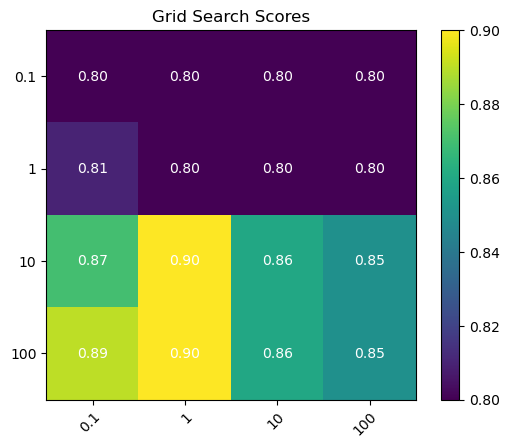

In [105]:
import matplotlib.pyplot as plt
import numpy as np

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
scores = []
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            svm = SVC(C=C, gamma=gamma, kernel=kernel)
            svm.fit(tfn, tl.ravel())
            score = svm.score(test_features[:50], test_labels[:50])
            scores.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}
print(best_parameters)
# Plot the scores as a heatmap
print(scores)
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']), len(param_grid['kernel']))
fig, ax = plt.subplots()
im = ax.imshow(scores.mean(axis=2), cmap='viridis')
ax.set_xticks(np.arange(len(param_grid['gamma'])))
ax.set_yticks(np.arange(len(param_grid['C'])))
ax.set_xticklabels(param_grid['gamma'])
ax.set_yticklabels(param_grid['C'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        text = ax.text(j, i, "{:.2f}".format(scores.mean(axis=2)[i, j]),
                       ha="center", va="center", color="w")
ax.set_title("Grid Search Scores")
fig.colorbar(im)
plt.show()

# random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [107]:
scores =[]
for k in range(5, 20):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(train_features, train_labels.ravel())
    y_pred = rfc.predict(test_features)
    scores.append(accuracy_score(test_labels, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(5, 20), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

In [108]:
# Create random forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=116)####

# Fit model to training data
rf_model.fit(train_features, train_labels.ravel())

# Make predictions on test data
test_pred = rf_model.predict(test_features)

# Evaluate model performance
accuracy = accuracy_score(test_labels, test_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 84.66%


In [109]:
rfc = RandomForestClassifier(n_estimators=116, random_state=42)

# Fit the model on the training set
rfc.fit(train_features, train_labels.ravel())

# Make predictions on the validation set
y_pred_val = rfc.predict(test_features)

# Calculate the accuracy of the predictions on the validation set
acc_val = accuracy_score(test_labels, y_pred_val)

# Make predictions on the test set
y_pred_test = rfc.predict(test_features)

# Calculate the accuracy of the predictions on the test set
acc_test = accuracy_score(test_labels, y_pred_test)

y_pred_train = rfc.predict(train_features)
acc_train = accuracy_score(train_labels, y_pred_train)

print(f"Training set accuracy: {acc_train:.2f}")

print(f"Test set accuracy: {acc_test:.2f}")



Training set accuracy: 1.00
Test set accuracy: 0.83


In [110]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels, y_pred_test, average='weighted')
recall = recall_score(test_labels, y_pred_test, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 0.86
Recall on test set: 0.83


# knn

In [111]:
from sklearn.neighbors import KNeighborsClassifier


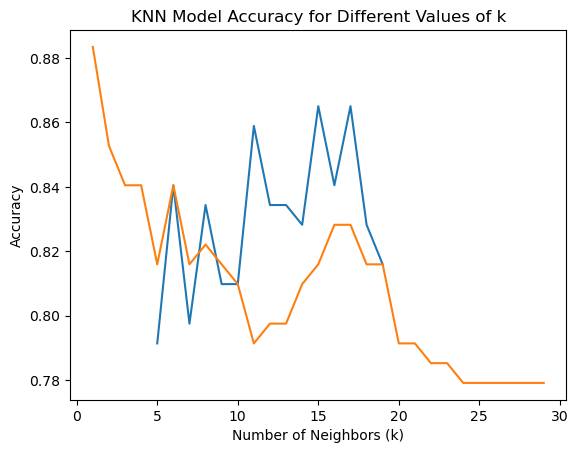

In [112]:
import matplotlib.pyplot as plt

k_values = []
accuracy_scores = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels.ravel())
    y_pred = knn.predict(test_features)
    score = accuracy_score(test_labels, y_pred)
    k_values.append(k)
    accuracy_scores.append(score)

plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different Values of k')
plt.show()

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit the KNN model to the training data
knn = KNeighborsClassifier(n_neighbors=9)###
knn.fit(train_features, train_labels.ravel())

# Predict the classes of the testing data
test_pred = knn.predict(test_features)

# Calculate the accuracy of the KNN model
accuracy = accuracy_score(test_labels, test_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 81.60%


In [114]:
# Train KNN model with different hyperparameters and choose the best one using validation set
best_k = None
best_score = 0.0
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels.ravel())
    y_pred = knn.predict(test_features)
    score = accuracy_score(test_labels, y_pred)
    if score > best_score:
        best_k = k
        best_score = score

# Test KNN model with best hyperparameters on test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_features, train_labels.ravel())
y_pred = knn.predict(test_features)
score = accuracy_score(test_labels, y_pred)
print("Test set accuracy: {:.4f}".format(score))

Test set accuracy: 0.8834


In [115]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')

print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))

Precision on test set: 0.88
Recall on test set: 0.88


# logistic regression

In [116]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [117]:
write.csv(df_combined_train, "~/GSE_merging_data/train_DEG.csv")  # 41 genes out of 51
write.csv(df_combined_valid, "~/GSE_merging_data/valid_DEG.csv")
write.csv(df_combined_test, "~/GSE_merging_data/test_DEG.csv")

NameError: name 'write' is not defined

In [118]:
# Load the datasets
df_train = pd.read_csv("~/GSE_merging_data/train_final_merge_march_19.csv")
df_valid = pd.read_csv("~/GSE_merging_data/valid_final_merge_march_19.csv")
df_test = pd.read_csv("~/GSE_merging_data/test_final_merge_march_19.csv")

In [120]:
df_train = df_train.drop(columns=['Unnamed: 0','platform'])
df_train

,group,AP3D1,ATP6V0E1,B2M,BATF,BIRC2,CAPZA2,CARD8,CASP1,CD58,...,STK16,STK38,SYNM,TNFSF10,TRIP4,UBC,UQCR11,UQCRQ,Disease_state,tissue
0,0,0.046577,0.024129,0.005815,0.052148,0.030018,0.046532,0.052789,0.139586,0.156029,...,0.061056,0.032396,0.065516,0.145941,0.082623,0.012724,0.045419,0.041335,0,0
1,0,0.028345,0.021744,0.003347,0.085454,0.004920,0.002622,0.039414,0.089497,0.018766,...,0.061973,0.066236,0.065208,0.103848,0.050235,0.007056,0.042661,0.026424,1,0
2,1,0.054130,0.017917,0.004756,0.062629,0.036247,0.013192,0.040761,0.107892,0.140035,...,0.050115,0.027877,0.097114,0.084372,0.085053,0.007857,0.053181,0.046875,1,0
3,0,0.061846,0.031999,0.005880,0.082412,0.032604,0.044847,0.088618,0.137878,0.139796,...,0.095686,0.045053,0.093134,0.153439,0.093865,0.016553,0.042976,0.033386,1,0
4,1,0.065820,0.033373,0.006863,0.092056,0.032079,0.057087,0.079957,0.140328,0.143336,...,0.095974,0.048041,0.113223,0.140051,0.099980,0.014788,0.053746,0.046452,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1,0.044323,0.029520,0.005674,0.106776,0.031902,0.061114,0.079584,0.106088,0.151143,...,0.044730,0.022215,0.067778,0.118336,0.085124,0.007441,0.036748,0.045493,1,0
374,0,0.068487,0.029244,0.005305,0.084799,0.022636,0.025580,0.070832,0.139306,0.124677,...,0.058275,0.050238,0.097002,0.150754,0.088708,0.014563,0.028446,0.009321,0,0
375,0,0.064892,0.033789,0.006966,0.095385,0.025393,0.056984,0.079779,0.140653,0.139140,...,0.091179,0.049831,0.116939,0.149790,0.095882,0.016077,0.042374,0.035540,1,0
376,0,0.038698,0.023700,0.005028,0.055239,0.025528,0.037315,0.025188,0.119368,0.156524,...,0.067655,0.031448,0.084106,0.148740,0.079497,0.014704,0.044008,0.039687,0,0


In [121]:
df_valid = df_valid.drop(columns=['Unnamed: 0','platform'])
df_valid

,group,AP3D1,ATP6V0E1,B2M,BATF,BIRC2,CAPZA2,CARD8,CASP1,CD58,...,STK16,STK38,SYNM,TNFSF10,TRIP4,UBC,UQCR11,UQCRQ,Disease_state,tissue
0,0,0.071244,0.033909,0.005789,0.083274,0.030961,0.025667,0.083050,0.146290,0.141233,...,0.109207,0.048570,0.124036,0.156647,0.094526,0.015293,0.047047,0.029612,1,0
1,1,0.036625,0.029734,0.004627,0.081169,0.031823,0.045499,0.072890,0.090024,0.087385,...,0.044784,0.017043,0.047783,0.095549,0.070087,0.004459,0.034895,0.041531,1,0
2,0,0.033232,0.017911,0.002037,0.048251,0.028666,0.017154,0.048838,0.061195,0.017280,...,0.029375,0.054752,0.054028,0.054632,0.058932,0.008324,0.045820,0.032077,0,0
3,1,0.925034,0.934487,0.925523,0.728557,0.999998,0.960225,0.857248,0.845722,0.925871,...,0.910946,0.999995,0.927070,0.869150,0.999989,0.922790,0.882925,0.911991,1,1
4,0,0.055583,0.023328,0.005582,0.059013,0.041125,0.036928,0.044307,0.108759,0.141530,...,0.078716,0.040033,0.107717,0.099321,0.085860,0.009250,0.053729,0.044732,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0.065152,0.032406,0.006800,0.080647,0.030828,0.050179,0.088614,0.142548,0.141146,...,0.086727,0.051870,0.115653,0.151624,0.099185,0.017112,0.035074,0.025314,1,0
159,0,0.034295,0.015647,0.005369,0.087741,0.034581,0.011563,0.056147,0.074121,0.120123,...,0.037350,0.039417,0.101791,0.090510,0.077129,0.007757,0.038024,0.034647,0,0
160,1,0.064926,0.029913,0.008248,0.095899,0.032543,0.048184,0.085243,0.141284,0.144805,...,0.089504,0.041880,0.107587,0.153875,0.094773,0.016322,0.043544,0.035601,1,0
161,0,0.070422,0.028027,0.004393,0.072520,0.020475,0.044814,0.075461,0.129432,0.125019,...,0.091014,0.046699,0.119217,0.139177,0.087626,0.015215,0.037777,0.015365,0,0


In [122]:
df_test = df_test.drop(columns=['Unnamed: 0','platform'])
df_test

,group,AP3D1,ATP6V0E1,B2M,BATF,BIRC2,CAPZA2,CARD8,CASP1,CD58,...,STK16,STK38,SYNM,TNFSF10,TRIP4,UBC,UQCR11,UQCRQ,Disease_state,tissue
0,1,8.924812,1.632268,11.170739,5.232661,4.877744,6.892391,3.981853,3.536053,5.517276,...,5.270529,4.378512,4.666757,6.264912,4.255501,10.821216,9.937227,11.216625,1,0
1,0,8.728601,0.678072,10.177295,4.350497,6.272397,7.347843,4.847997,3.446256,5.432959,...,5.133399,4.452859,5.350497,6.920055,4.104337,11.520078,9.682995,10.753718,1,0
2,1,8.572890,-0.152003,12.307229,3.596935,6.861707,7.689998,4.087463,3.916477,6.469235,...,5.318317,5.672425,4.700440,6.504620,4.716991,11.016390,9.605109,10.882796,1,0
3,0,8.534108,1.000000,12.063429,3.786596,7.226894,8.106432,4.638074,3.954196,6.485427,...,5.057450,5.017922,5.462707,6.963474,3.678072,10.948805,9.136991,10.615722,1,0
4,0,9.070658,-0.321928,11.464597,4.399171,5.070389,7.386294,4.129283,0.847997,5.013462,...,5.815063,3.916477,5.181898,4.902074,3.364572,11.193710,9.497652,10.809768,1,0
5,1,8.803808,-0.321928,10.756223,3.153805,6.900867,7.633722,4.977280,4.517276,7.198691,...,5.422906,5.165912,3.897240,6.860466,3.700440,10.904108,9.277985,10.575256,0,0
6,1,8.683346,0.485427,8.284940,4.247928,5.802193,7.023477,3.817623,1.632268,6.429616,...,5.149747,4.842979,5.259272,7.252665,3.847997,11.202552,9.222795,10.534789,0,0
7,1,8.827184,0.678072,12.145232,4.722466,6.247928,7.311067,4.944858,4.426265,6.251719,...,5.923625,5.255501,4.554589,6.574404,3.972693,10.946979,10.530796,11.307429,0,0
8,1,9.005624,0.485427,12.078885,4.560715,5.350497,7.131342,4.385431,3.797013,6.725196,...,5.683696,5.095924,4.201634,6.906891,3.378512,10.769425,9.815543,11.191429,0,0
9,1,8.881420,1.321928,11.803970,4.371559,5.947199,7.127221,4.776104,2.321928,6.655352,...,5.760221,5.274262,4.371559,6.589464,3.336283,10.828613,9.777420,11.007588,0,0


In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


exclude_columns = ['Disease_state', 'group','tissue']

# Separate the columns to scale and the ones to exclude
columns_to_scale = [col for col in df_test.columns if col not in exclude_columns]
data_to_scale = df_test[columns_to_scale]
data_to_exclude = df_test[exclude_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data to scale
scaled_data = scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the excluded columns
final_df = pd.concat([data_to_exclude.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)

final_df

,Disease_state,group,tissue,AP3D1,ATP6V0E1,B2M,BATF,BIRC2,CAPZA2,CARD8,...,SAT1,STAT1,STK16,STK38,SYNM,TNFSF10,TRIP4,UBC,UQCR11,UQCRQ
0,1,1,0,-1.125150,-1.668989,-1.692484,-1.320090,-2.405249,1.273895,-2.053816,...,-1.660037,-1.927213,-1.969979,-1.978117,0.485877,-1.591568,-1.663723,-1.986957,-1.482191,-0.353720
1,1,0,0,-1.631847,-1.864429,-2.444365,-1.683467,-1.746312,1.567642,-1.651943,...,-1.816629,-2.402169,-2.109015,-1.927032,1.080832,-1.334625,-1.735962,-1.112905,-1.744483,-1.500914
2,1,1,0,-2.033955,-2.034446,-0.832338,-1.993871,-1.467878,1.788317,-2.004815,...,-1.866959,-2.000804,-1.921527,-1.089048,0.515186,-1.497556,-1.443184,-1.742856,-1.824838,-1.181028
3,1,0,0,-2.134104,-1.798491,-1.016857,-1.915747,-1.295337,2.056900,-1.749343,...,-1.957263,-1.852570,-2.186020,-1.538768,1.178471,-1.317597,-1.939668,-1.827384,-2.307797,-1.842903
4,1,0,0,-0.748520,-2.069251,-1.470079,-1.663417,-2.314229,1.592441,-1.985411,...,-2.083389,-2.036123,-1.417875,-2.295589,0.934125,-2.126064,-2.089485,-1.521086,-1.935702,-1.362009
5,0,1,0,-1.437632,-2.069251,-2.006207,-2.176403,-1.449377,1.752022,-1.591958,...,-1.866959,-1.725348,-1.815484,-1.437082,-0.183716,-1.357996,-1.928979,-1.883286,-2.162333,-1.943188
6,0,1,0,-1.748714,-1.903887,-3.876582,-1.725717,-1.968471,1.358440,-2.130015,...,-1.973723,-1.529162,-2.092440,-1.658974,1.001453,-1.204178,-1.858463,-1.510028,-2.219273,-2.043474
7,0,1,0,-1.377266,-1.864429,-0.954945,-1.530247,-1.757873,1.543923,-1.607001,...,-1.806441,-1.716660,-1.307804,-1.375524,0.388274,-1.470187,-1.798873,-1.829667,-0.869804,-0.128686
8,0,1,0,-0.916462,-1.903887,-1.005160,-1.596875,-2.181886,1.428009,-1.866564,...,-1.934056,-1.575622,-1.551068,-1.485171,0.081151,-1.339788,-2.082823,-2.051731,-1.607732,-0.416160
9,0,1,0,-1.237207,-1.732553,-1.213227,-1.674791,-1.899960,1.425350,-1.685300,...,-1.860961,-1.716660,-1.473479,-1.362633,0.229011,-1.464281,-2.103003,-1.977706,-1.647065,-0.871763


In [124]:
final_df = final_df[[col for col in final_df.columns if col not in ['Disease_state', 'tissue']] + ['Disease_state', 'tissue']]



In [125]:
df_combined = pd.concat([df_valid, final_df], ignore_index=True)

In [126]:
df_combined

,group,AP3D1,ATP6V0E1,B2M,BATF,BIRC2,CAPZA2,CARD8,CASP1,CD58,...,STK16,STK38,SYNM,TNFSF10,TRIP4,UBC,UQCR11,UQCRQ,Disease_state,tissue
0,0,0.071244,0.033909,0.005789,0.083274,0.030961,0.025667,0.083050,0.146290,0.141233,...,0.109207,0.048570,0.124036,0.156647,0.094526,0.015293,0.047047,0.029612,1,0
1,1,0.036625,0.029734,0.004627,0.081169,0.031823,0.045499,0.072890,0.090024,0.087385,...,0.044784,0.017043,0.047783,0.095549,0.070087,0.004459,0.034895,0.041531,1,0
2,0,0.033232,0.017911,0.002037,0.048251,0.028666,0.017154,0.048838,0.061195,0.017280,...,0.029375,0.054752,0.054028,0.054632,0.058932,0.008324,0.045820,0.032077,0,0
3,1,0.925034,0.934487,0.925523,0.728557,0.999998,0.960225,0.857248,0.845722,0.925871,...,0.910946,0.999995,0.927070,0.869150,0.999989,0.922790,0.882925,0.911991,1,1
4,0,0.055583,0.023328,0.005582,0.059013,0.041125,0.036928,0.044307,0.108759,0.141530,...,0.078716,0.040033,0.107717,0.099321,0.085860,0.009250,0.053729,0.044732,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0,-0.144146,0.512832,0.276127,0.038545,0.600533,-0.689609,1.039469,0.600404,0.342634,...,0.791138,1.194668,-0.476543,0.619347,0.885386,0.445305,-0.429684,-1.755125,1,1
205,1,0.557725,0.562371,0.178015,0.204059,0.311419,-1.488833,0.888735,0.513111,0.500496,...,0.944623,0.374350,-2.154577,0.426352,0.590551,0.189553,0.688816,0.634314,1,1
206,0,0.540607,0.579476,0.179117,0.252270,0.358847,-1.551940,0.816971,0.497883,0.491588,...,0.479579,0.787475,-0.553314,0.470184,0.648433,0.632094,0.563152,0.623471,1,1
207,1,1.214552,0.451319,0.131618,0.071664,0.429087,0.087638,1.015141,0.437641,0.315800,...,0.390279,1.337946,-2.038616,0.020012,0.471135,0.160728,0.452821,0.709642,1,1


In [127]:
df_train

,group,AP3D1,ATP6V0E1,B2M,BATF,BIRC2,CAPZA2,CARD8,CASP1,CD58,...,STK16,STK38,SYNM,TNFSF10,TRIP4,UBC,UQCR11,UQCRQ,Disease_state,tissue
0,0,0.046577,0.024129,0.005815,0.052148,0.030018,0.046532,0.052789,0.139586,0.156029,...,0.061056,0.032396,0.065516,0.145941,0.082623,0.012724,0.045419,0.041335,0,0
1,0,0.028345,0.021744,0.003347,0.085454,0.004920,0.002622,0.039414,0.089497,0.018766,...,0.061973,0.066236,0.065208,0.103848,0.050235,0.007056,0.042661,0.026424,1,0
2,1,0.054130,0.017917,0.004756,0.062629,0.036247,0.013192,0.040761,0.107892,0.140035,...,0.050115,0.027877,0.097114,0.084372,0.085053,0.007857,0.053181,0.046875,1,0
3,0,0.061846,0.031999,0.005880,0.082412,0.032604,0.044847,0.088618,0.137878,0.139796,...,0.095686,0.045053,0.093134,0.153439,0.093865,0.016553,0.042976,0.033386,1,0
4,1,0.065820,0.033373,0.006863,0.092056,0.032079,0.057087,0.079957,0.140328,0.143336,...,0.095974,0.048041,0.113223,0.140051,0.099980,0.014788,0.053746,0.046452,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1,0.044323,0.029520,0.005674,0.106776,0.031902,0.061114,0.079584,0.106088,0.151143,...,0.044730,0.022215,0.067778,0.118336,0.085124,0.007441,0.036748,0.045493,1,0
374,0,0.068487,0.029244,0.005305,0.084799,0.022636,0.025580,0.070832,0.139306,0.124677,...,0.058275,0.050238,0.097002,0.150754,0.088708,0.014563,0.028446,0.009321,0,0
375,0,0.064892,0.033789,0.006966,0.095385,0.025393,0.056984,0.079779,0.140653,0.139140,...,0.091179,0.049831,0.116939,0.149790,0.095882,0.016077,0.042374,0.035540,1,0
376,0,0.038698,0.023700,0.005028,0.055239,0.025528,0.037315,0.025188,0.119368,0.156524,...,0.067655,0.031448,0.084106,0.148740,0.079497,0.014704,0.044008,0.039687,0,0


In [128]:
# Assuming the target column is named 'target'
X_train = df_train.drop(columns=['group'])
y_train = df_train['group']

#X_valid = df_valid.drop(columns=['group'])
#y_valid = df_valid['group']

X_test = df_combined.drop(columns=['group'])
y_test = df_combined['group']

In [129]:
X_test

,AP3D1,ATP6V0E1,B2M,BATF,BIRC2,CAPZA2,CARD8,CASP1,CD58,CD59,...,STK16,STK38,SYNM,TNFSF10,TRIP4,UBC,UQCR11,UQCRQ,Disease_state,tissue
0,0.071244,0.033909,0.005789,0.083274,0.030961,0.025667,0.083050,0.146290,0.141233,0.095131,...,0.109207,0.048570,0.124036,0.156647,0.094526,0.015293,0.047047,0.029612,1,0
1,0.036625,0.029734,0.004627,0.081169,0.031823,0.045499,0.072890,0.090024,0.087385,0.065011,...,0.044784,0.017043,0.047783,0.095549,0.070087,0.004459,0.034895,0.041531,1,0
2,0.033232,0.017911,0.002037,0.048251,0.028666,0.017154,0.048838,0.061195,0.017280,0.069936,...,0.029375,0.054752,0.054028,0.054632,0.058932,0.008324,0.045820,0.032077,0,0
3,0.925034,0.934487,0.925523,0.728557,0.999998,0.960225,0.857248,0.845722,0.925871,0.929291,...,0.910946,0.999995,0.927070,0.869150,0.999989,0.922790,0.882925,0.911991,1,1
4,0.055583,0.023328,0.005582,0.059013,0.041125,0.036928,0.044307,0.108759,0.141530,0.084876,...,0.078716,0.040033,0.107717,0.099321,0.085860,0.009250,0.053729,0.044732,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,-0.144146,0.512832,0.276127,0.038545,0.600533,-0.689609,1.039469,0.600404,0.342634,-0.635621,...,0.791138,1.194668,-0.476543,0.619347,0.885386,0.445305,-0.429684,-1.755125,1,1
205,0.557725,0.562371,0.178015,0.204059,0.311419,-1.488833,0.888735,0.513111,0.500496,-0.875618,...,0.944623,0.374350,-2.154577,0.426352,0.590551,0.189553,0.688816,0.634314,1,1
206,0.540607,0.579476,0.179117,0.252270,0.358847,-1.551940,0.816971,0.497883,0.491588,-0.375144,...,0.479579,0.787475,-0.553314,0.470184,0.648433,0.632094,0.563152,0.623471,1,1
207,1.214552,0.451319,0.131618,0.071664,0.429087,0.087638,1.015141,0.437641,0.315800,-1.216922,...,0.390279,1.337946,-2.038616,0.020012,0.471135,0.160728,0.452821,0.709642,1,1


In [130]:
# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [131]:
logistic_model

LogisticRegression()

In [132]:
# Predict on training data
train_pred = logistic_model.predict(X_train)

# Predict on validation data
#valid_pred = logistic_model.predict(X_valid)

# Predict on test data
test_pred = logistic_model.predict(X_test)

In [133]:
# Calculate accuracy for training data
train_accuracy = accuracy_score(y_train, train_pred)

# Calculate accuracy for validation data
#valid_accuracy = accuracy_score(y_valid, valid_pred)

# Calculate accuracy for test data
test_accuracy = accuracy_score(y_test, test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
#print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8624
Test Accuracy: 0.7560


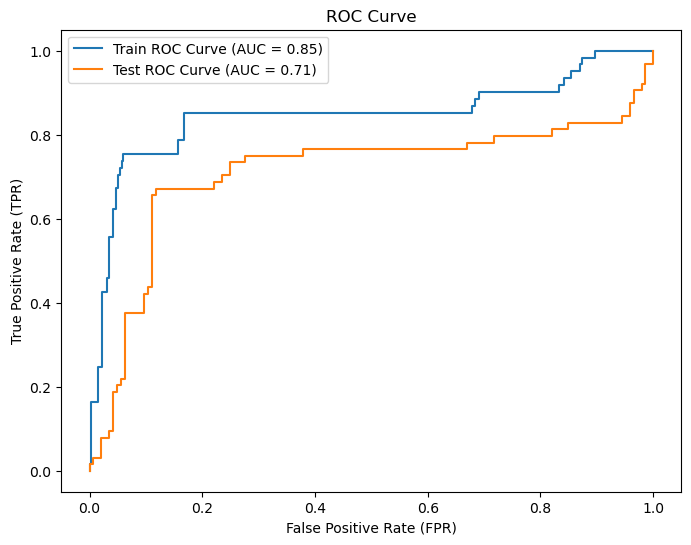

In [135]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Get Predicted Probabilities for the Positive Class
# Use the best SVM model to get predicted probabilities
train_probs = logistic_model.predict_proba(X_train)[:, 1]  # Probabilities for the positive class
test_probs = logistic_model.predict_proba(X_test)[:, 1]

# Step 2: Calculate ROC Curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)

# Step 3: Calculate AUC (Area Under the Curve)
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
#plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [138]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100,1000],  # Regularization parameter
    'kernel': ['linear', 'rbf','sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_svm_model = grid_search.best_estimator_

# Step 6: Make Predictions
train_pred = best_svm_model.predict(X_train)
#valid_pred = best_svm_model.predict(X_valid)
test_pred = best_svm_model.predict(X_test)

# Step 7: Calculate Accuracy
train_accuracy = accuracy_score(y_train, train_pred)
#valid_accuracy = accuracy_score(y_valid, valid_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Step 8: Print the Accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
#print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.9683
Test Accuracy: 0.8660


In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report




# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'rbf')

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Detailed classification report for training data
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Detailed classification report for test data
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.86

Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       317
           1       0.91      0.16      0.28        61

    accuracy                           0.86       378
   macro avg       0.89      0.58      0.60       378
weighted avg       0.87      0.86      0.82       378


Test Accuracy: 0.78

Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       145
           1       0.76      0.39      0.52        64

    accuracy                           0.78       209
   macro avg       0.77      0.67      0.68       209
weighted avg       0.77      0.78      0.75       209

